In [3]:
import numpy as np
import cv2
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
import tensorflow as tf
from nilearn import plotting
import pylab as plt
%matplotlib inline

import numpy as np
import nibabel as nb

In [2]:
example_filename = r"C:\Users\luhar\SIH 2022\Data\sub-control01\ses-01\dwi\sub-control01_ses-01_dwi.nii.gz"
raw_img=nib.load(example_filename)
img = np.array(raw_img.get_fdata())

In [3]:
print(raw_img.header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b'?TR:9422.450 TE:89'
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  4 128 128  50  16   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.         2.         2.         3.0000012  9.42245    1.
  1.         1.       ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 255
glmin           : 0
descrip         : b'AGNOLONI SAMUELE'
aux_file        : b'MR000586'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.9999929
quatern_d       : 0.0
qoffset_x    

In [4]:
img.dtype

dtype('float64')

(128, 128, 50)



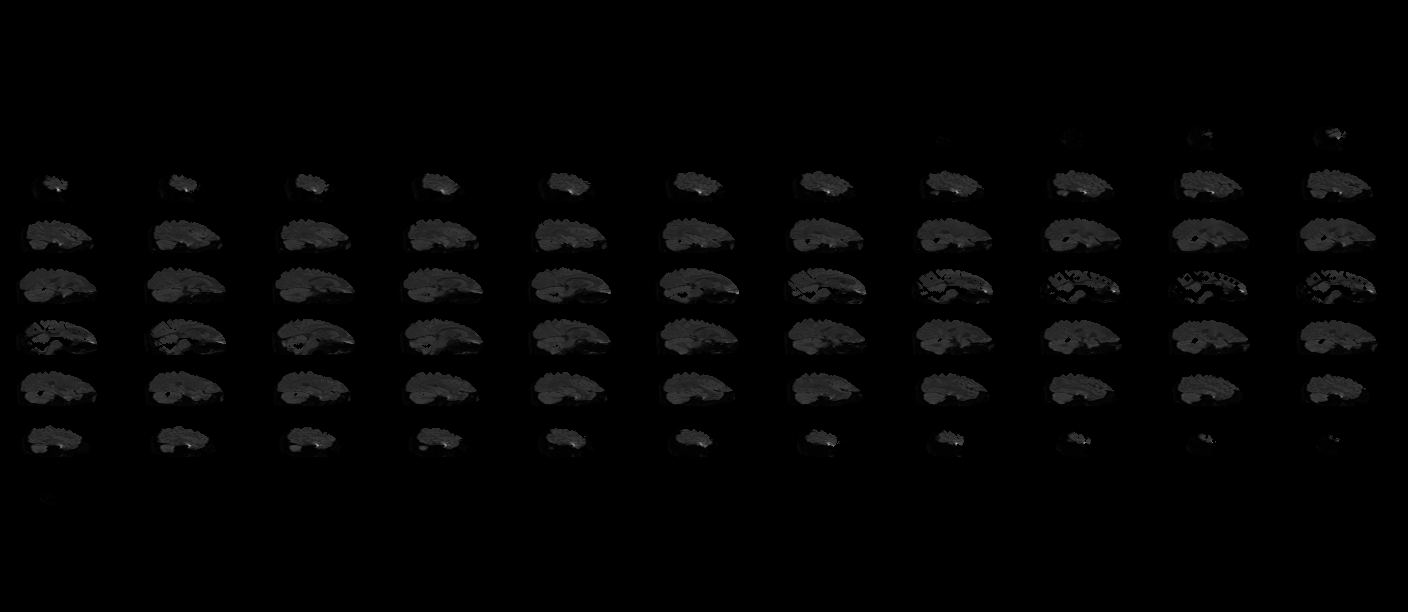
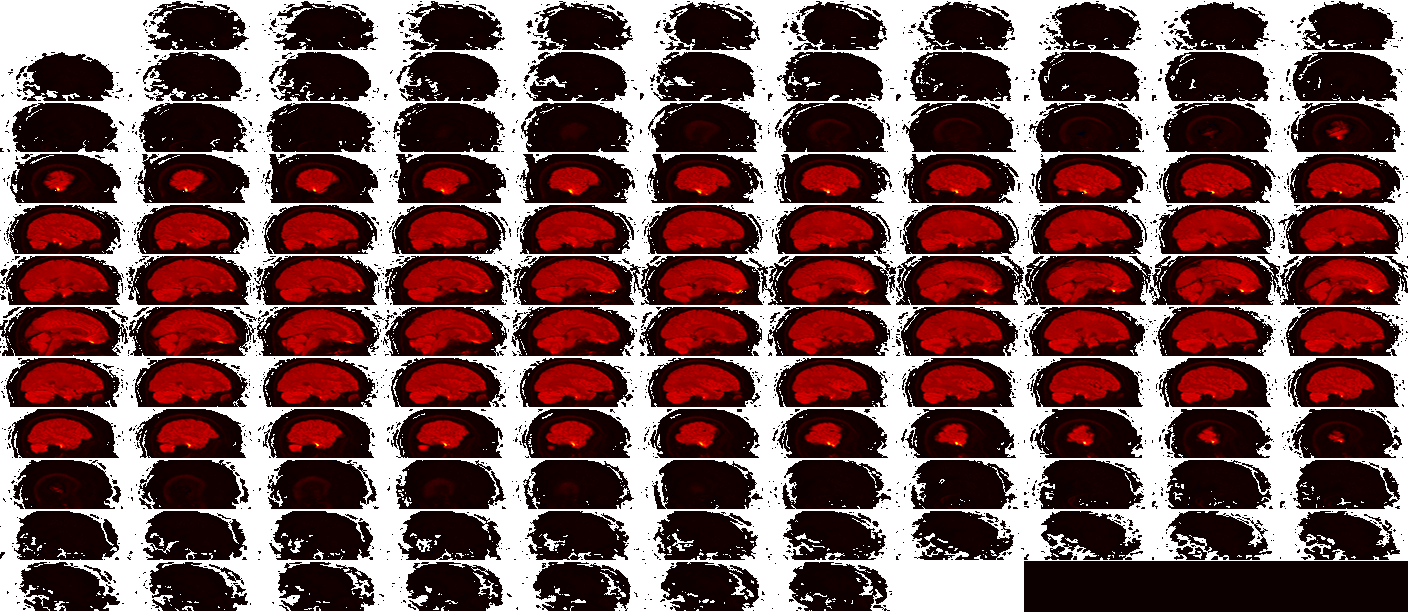

In [5]:
from nilearn import image as nil
img1=nil.mean_img(raw_img)
print(img1.shape)
plotting.view_img(img1,bg_img=img1)

In [6]:

example_filename = r"C:\Users\luhar\.dipy\sherbrooke_3shell\HARDI193.nii.gz"
raw_img=nib.load(example_filename)
img = np.array(raw_img.get_fdata())

In [7]:
img.shape

(128, 128, 60, 193)

In [8]:
for fwhm in range(1,12,1):
    smoothed_img=nil.smooth_img(mean,fwhm)
    plotting.plot_epi(smoothed_img,display_mode='z',cmap='magma')

NameError: name 'mean' is not defined

In [ ]:
a=open(r"C:\Users\luhar\Downloads\Example_data_for_ExploreDTI\Example_data_for_ExploreDTI.mat")

In [9]:
import scipy.io as sio

def load_from_mat(filename=None, data={}, loaded=None):
    if filename:
        vrs = sio.whosmat(filename)
        name = vrs[0][0]
        loaded = sio.loadmat(filename,struct_as_record=True)
        print(loaded.sh)
        loaded = loaded[name]
    whats_inside = loaded.dtype.fields
    fields = list(whats_inside.keys())
    for field in fields:
        if len(loaded[0,0][field].dtype) > 0: # it's a struct
            data[field] = {}
            data[field] = load_from_mat(data=data[field], loaded=loaded[0,0][field])
        else: # it's a variable
            data[field] = loaded[0,0][field]
    return data

# and then just call the function
my_file = r"C:\Users\luhar\Downloads\Example_data_for_ExploreDTI\Example_data_for_ExploreDTI.mat"
data = load_from_mat(filename=my_file)

AttributeError: 'dict' object has no attribute 'sh'

In [40]:
!pip install dipy

You should consider upgrading via the 'c:\users\luhar\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
from dipy.core.gradients import gradient_table
from dipy.data import get_fnames
from dipy.io.gradients import read_bvals_bvecs
from dipy.io.image import load_nifti, load_nifti_data
im
hardi_fname, hardi_bval_fname, hardi_bvec_fname = get_fnames('stanford_hardi')
label_fname = get_fnames('stanford_labels')

0 2000
[   0  120  121  130  131  142  143  144  145  146  147  150  151  162
  163  164  165  166  167  168  169  170  171  172  173  182  183  184
  185  186  187  222  223  224  225  226  227  228  229  242  243  310
  311  322  323  324  325  326  327  328  329  330  331  342  343  344
  345  346  347  422  423  424  425  442  443  444  445  446  447  500
  501  612  613  614  615  616  617  620  621  630  631  640  641  650
  651  660  661  662  663  670  671  680  681  690  691  701  720  740
  800  900 2000]
0


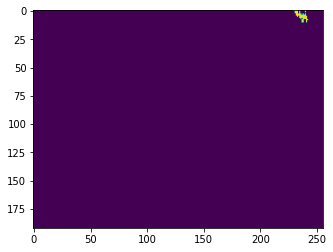

1


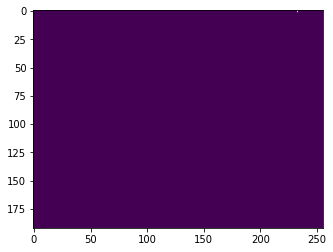

2


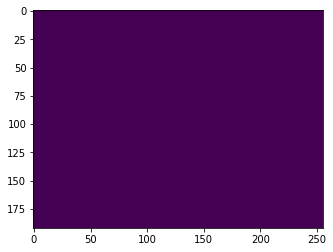

3


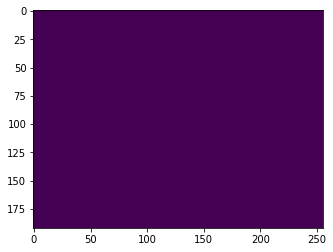

4


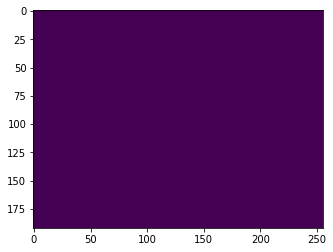

5


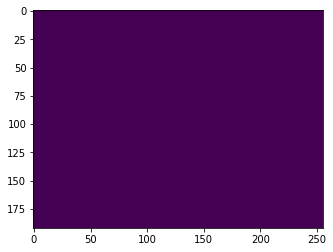

6


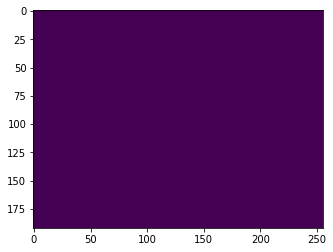

7


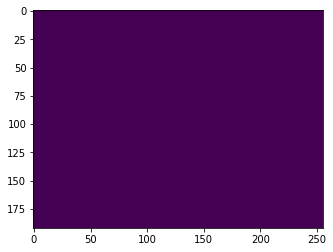

8


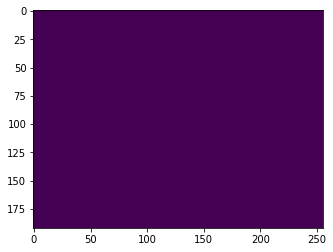

9


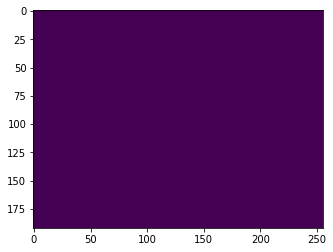

10


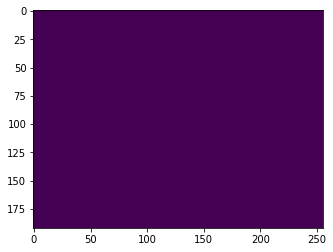

11


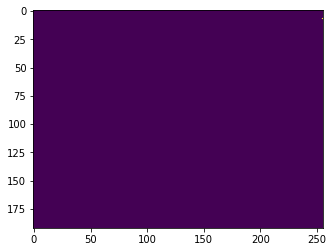

12


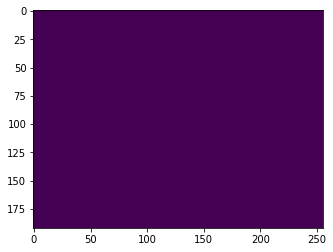

13


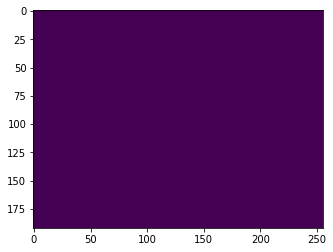

14


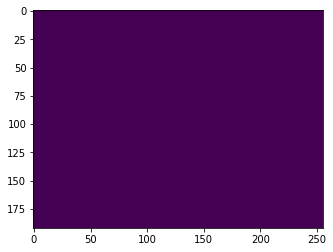

15


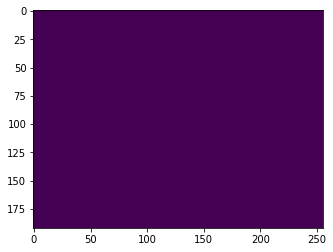

16


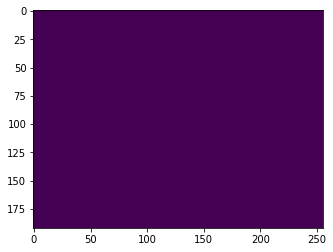

17


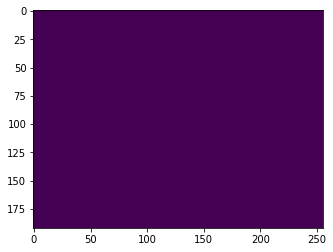

18


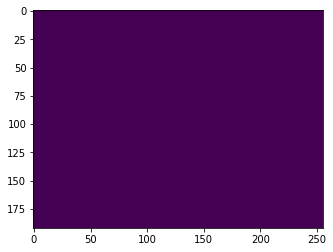

19


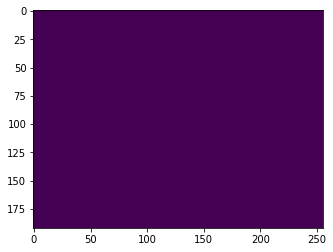

20


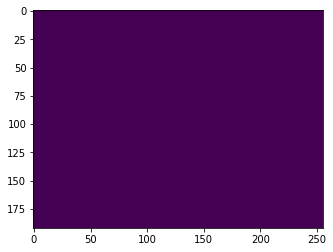

21


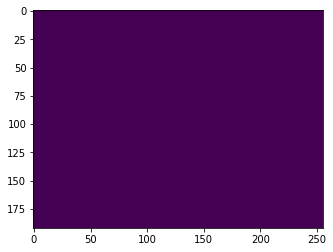

22


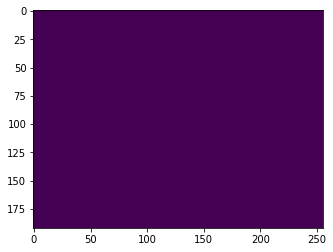

23


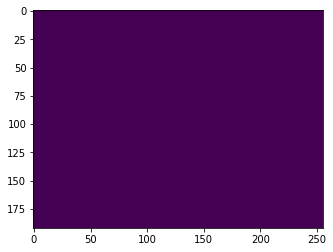

24


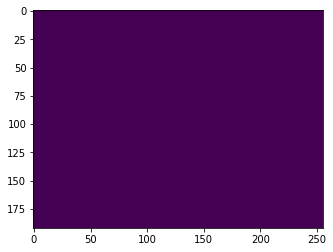

25


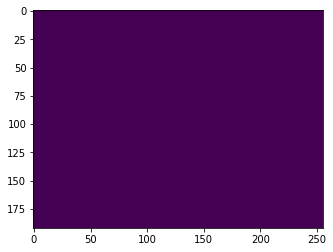

26


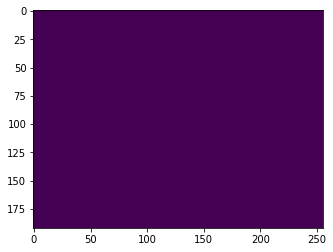

27


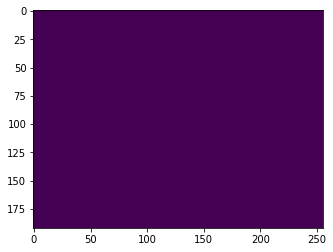

28


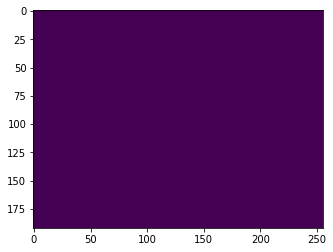

29


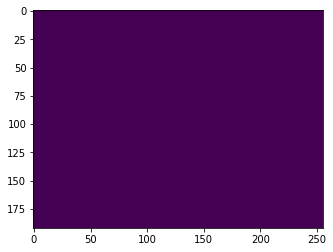

30


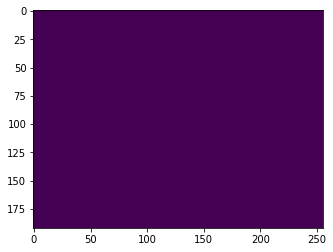

31


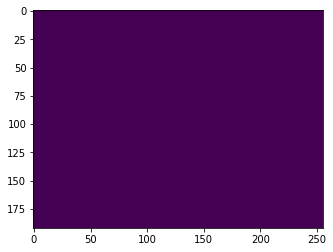

32


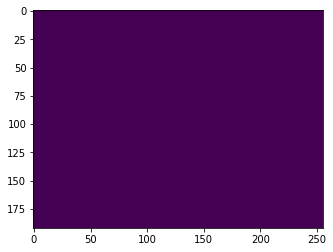

33


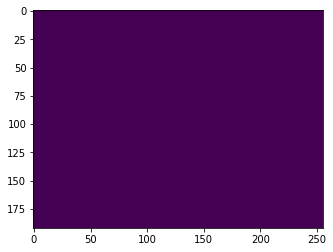

34


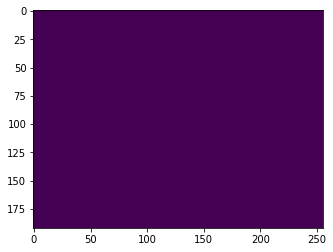

35


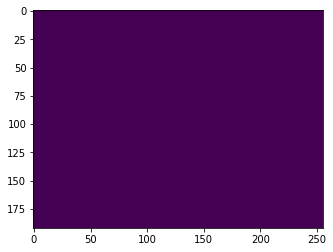

36


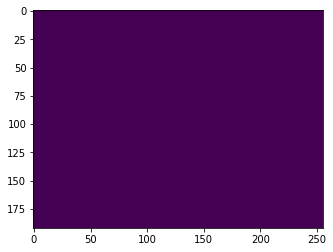

37


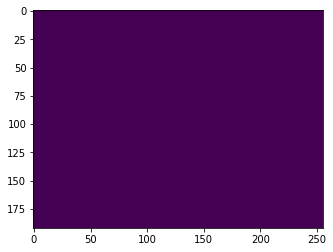

38


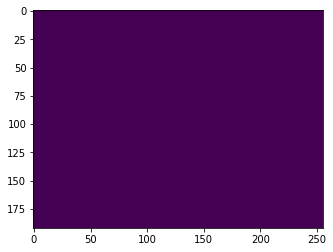

39


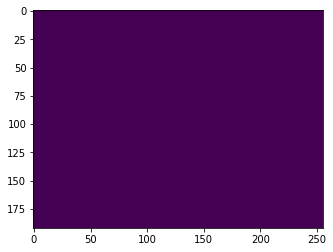

40


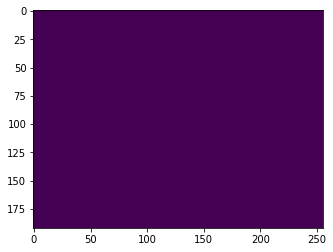

41


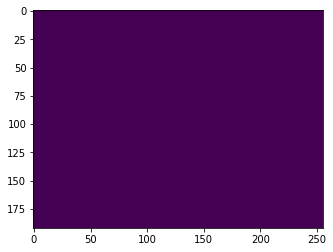

42


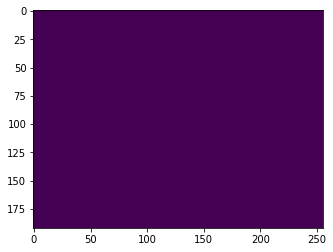

43


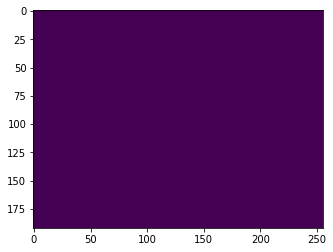

44


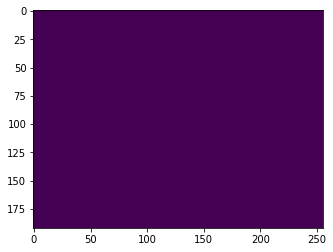

45


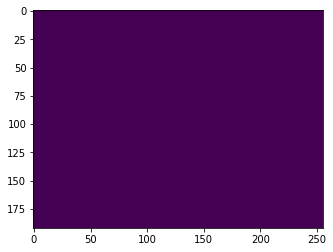

46


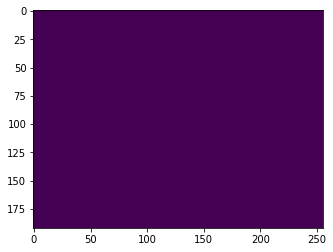

47


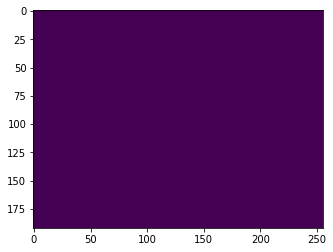

48


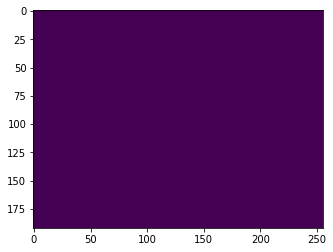

49


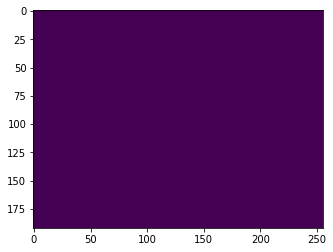

50


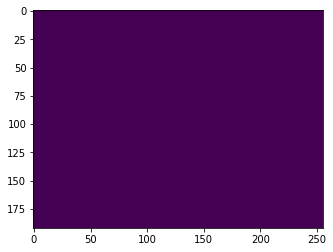

51


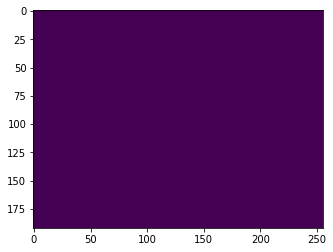

52


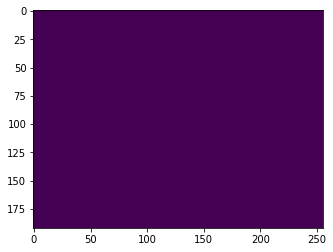

53


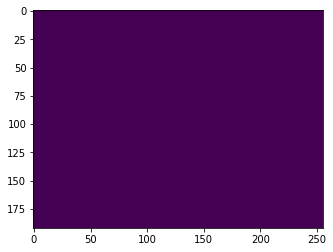

54


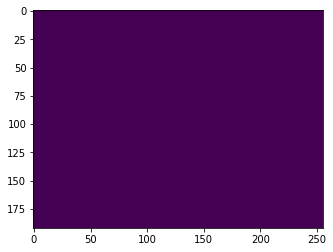

55


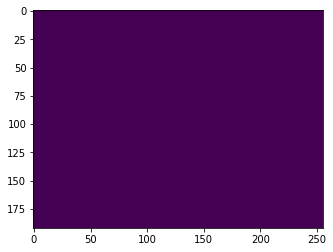

56


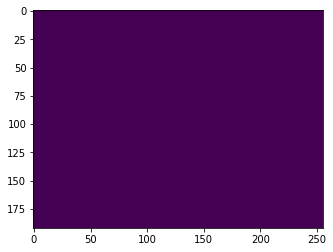

57


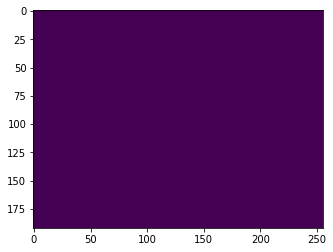

58


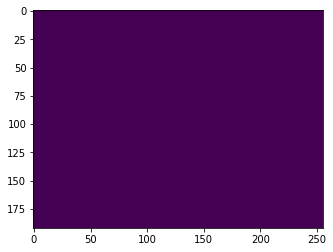

59


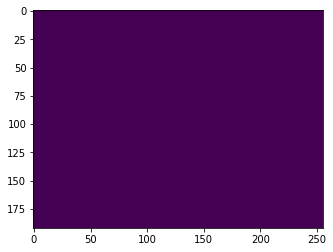

60


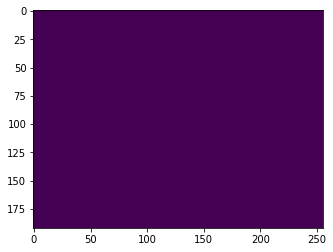

61


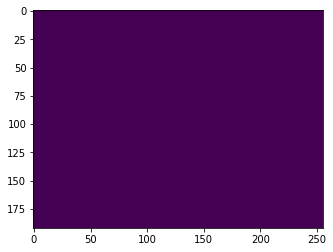

62


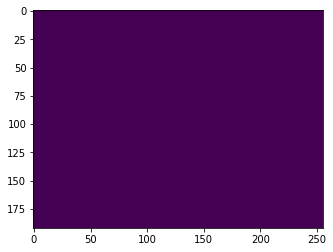

63


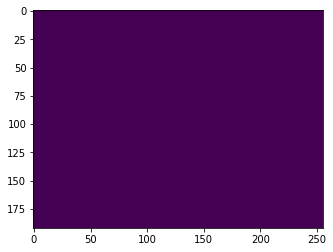

64


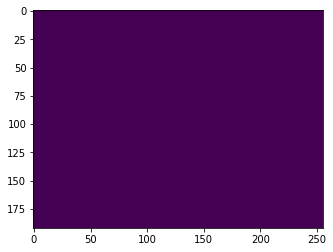

65


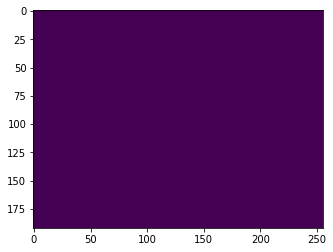

66


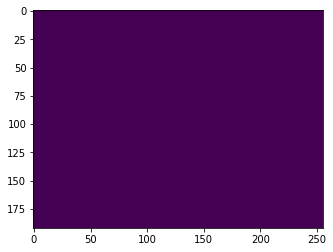

67


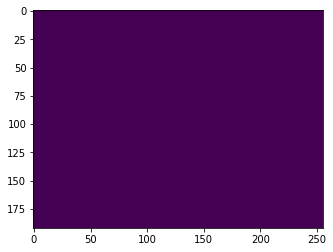

68


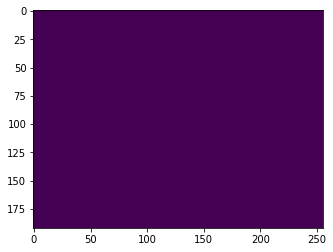

69


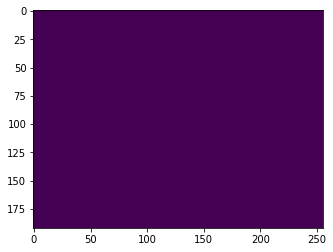

70


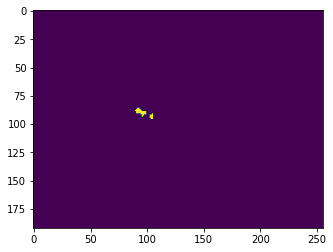

71


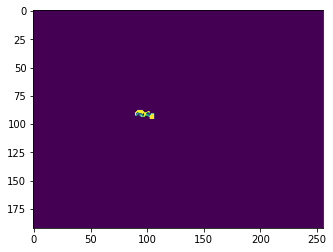

72


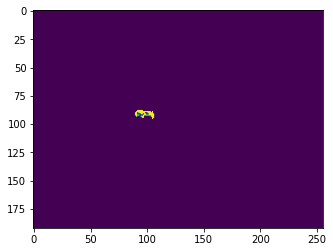

73


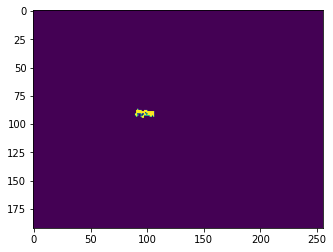

74


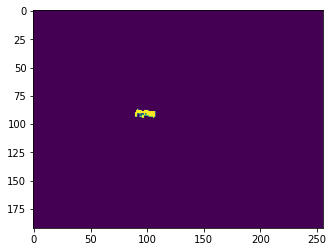

75


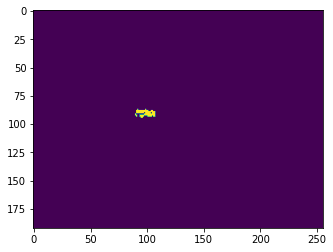

76


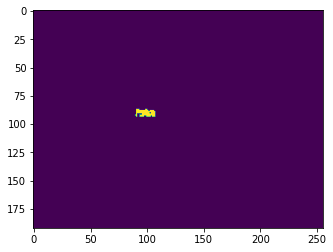

77


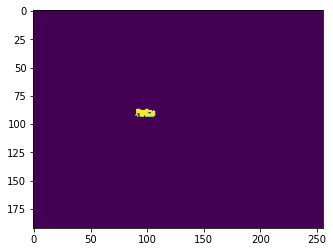

78


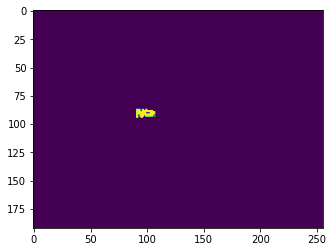

79


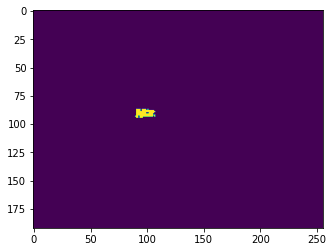

80


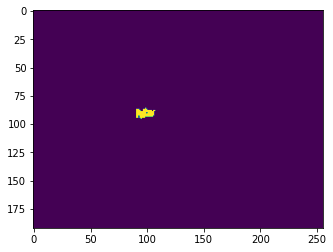

81


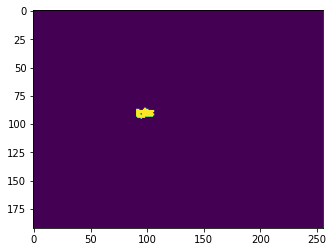

82


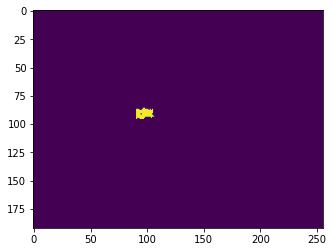

83


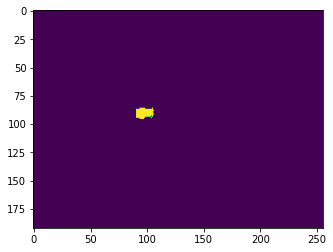

84


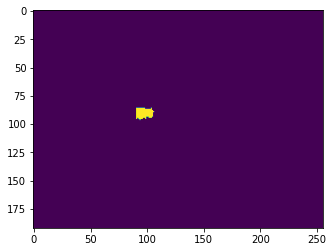

85


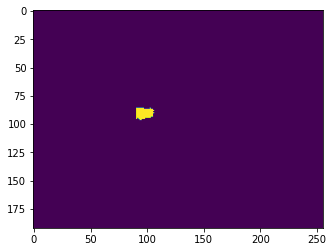

86


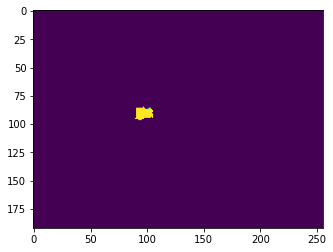

87


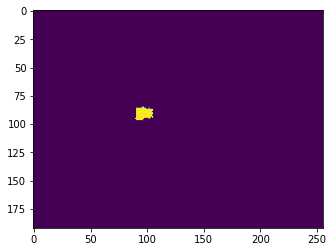

88


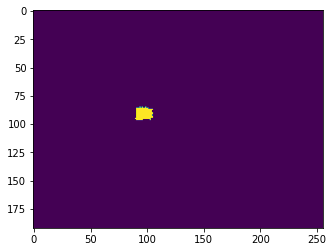

89


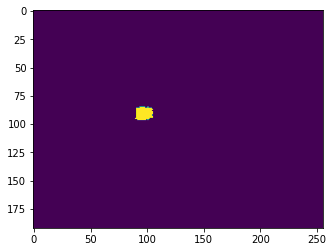

90


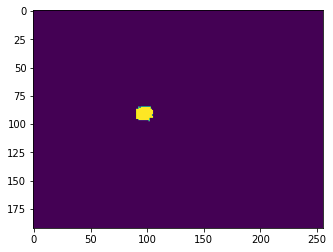

91


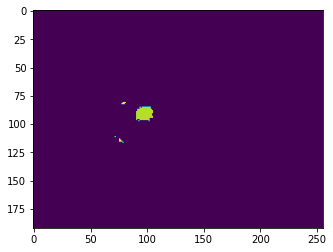

92


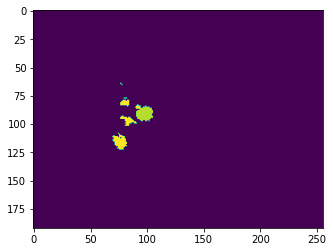

93


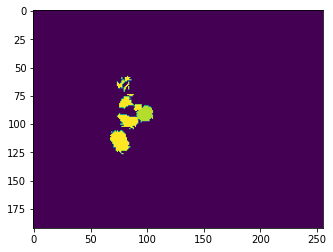

94


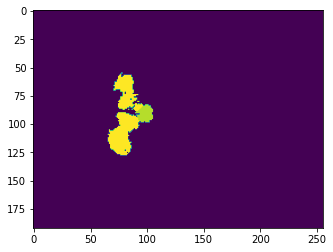

95


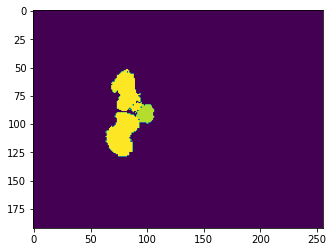

96


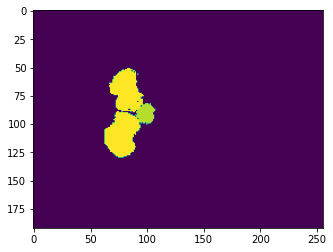

97


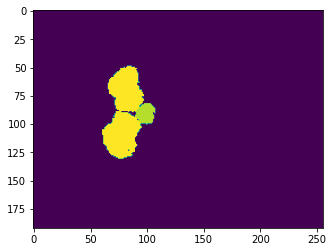

98


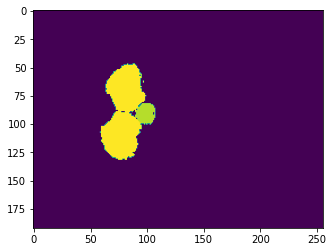

99


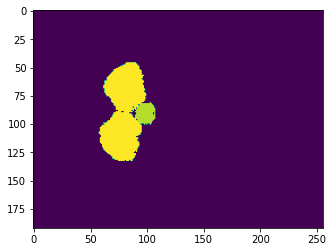

100


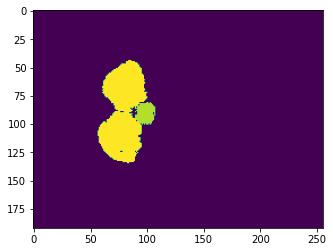

101


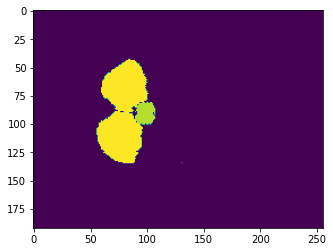

102


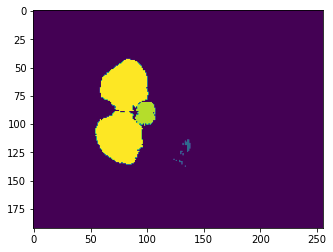

103


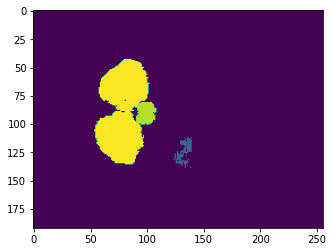

104


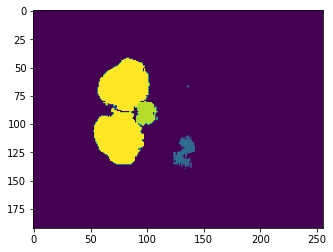

105


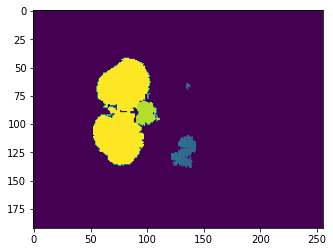

106


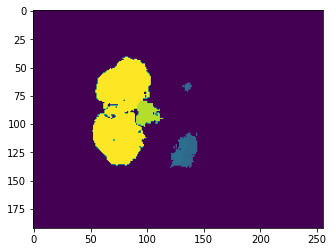

107


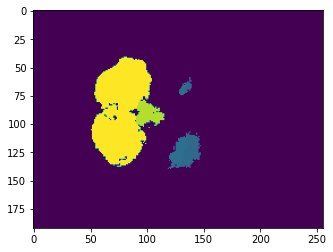

108


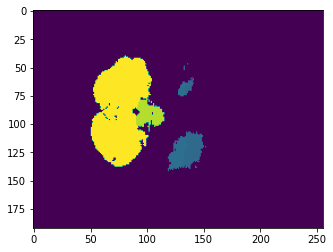

109


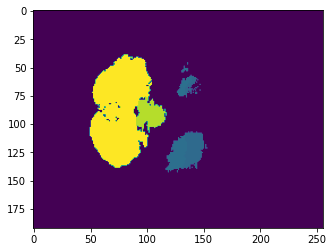

110


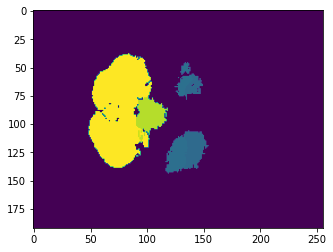

111


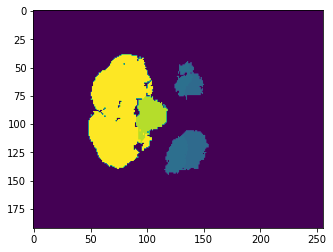

112


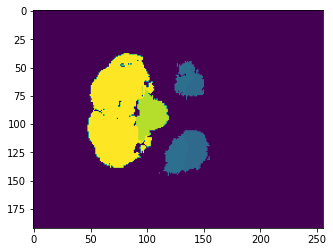

113


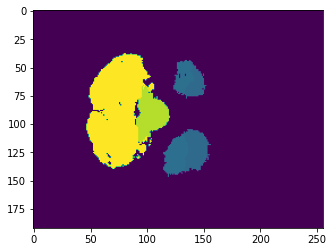

114


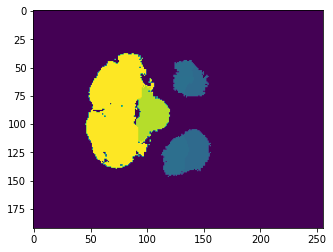

115


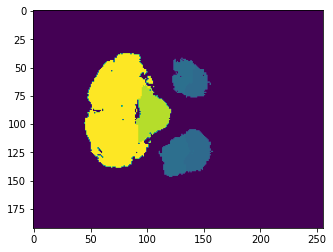

116


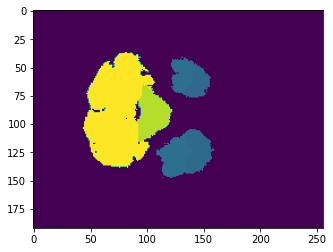

117


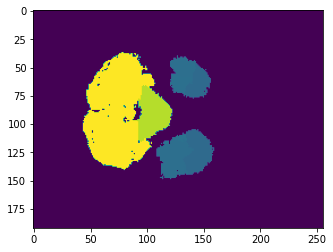

118


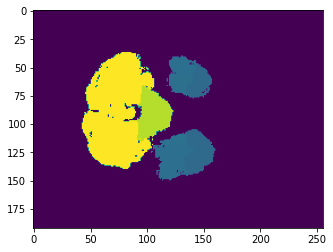

119


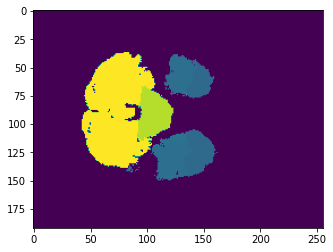

120


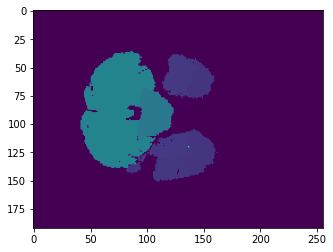

121


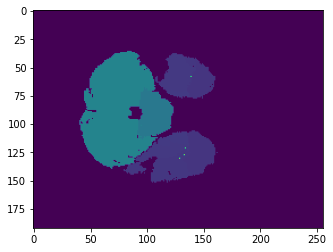

122


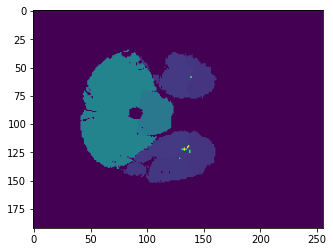

123


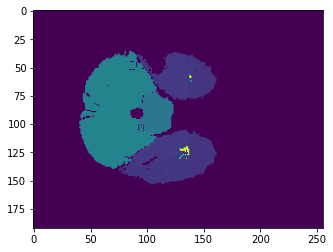

124


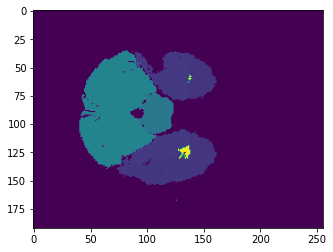

125


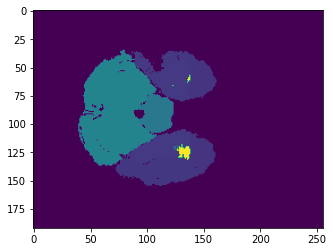

126


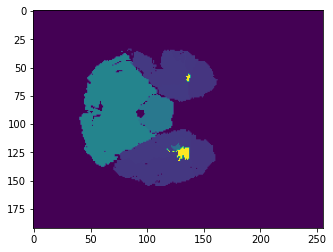

127


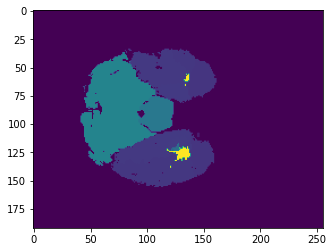

128


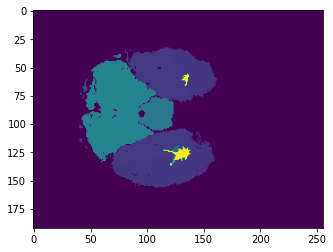

129


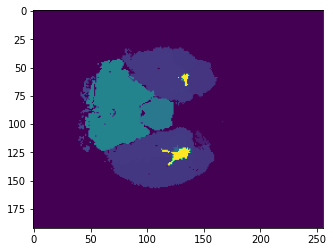

130


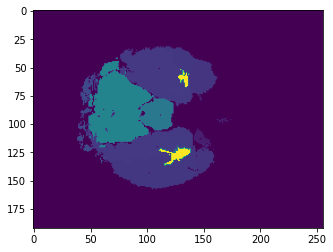

131


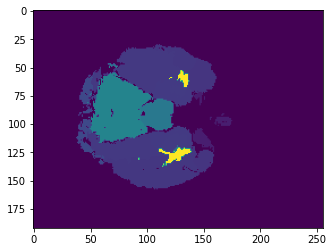

132


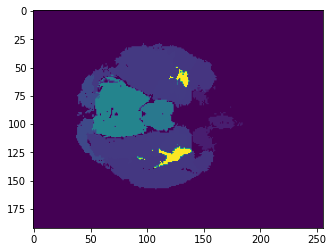

133


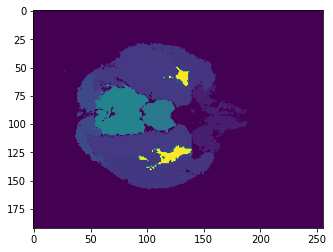

134


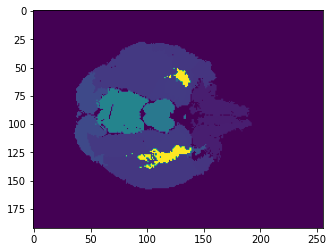

135


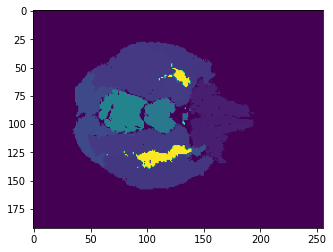

136


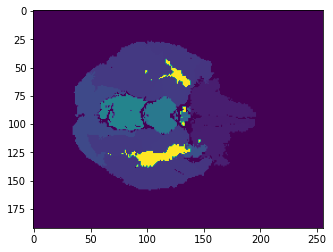

137


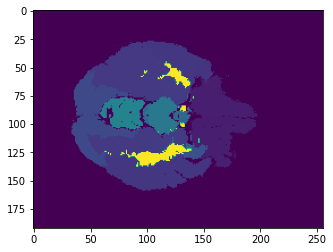

138


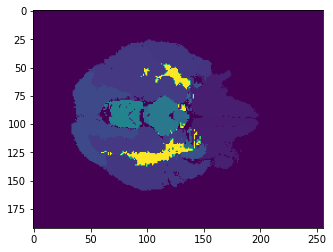

139


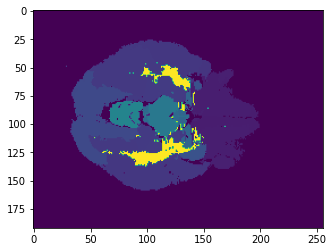

140


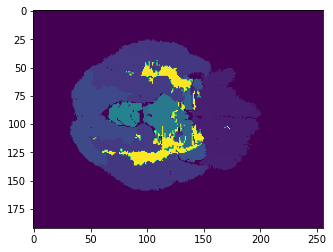

141


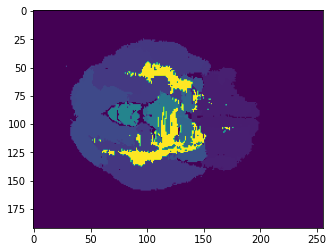

142


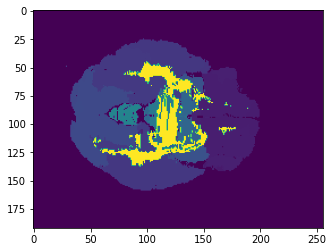

143


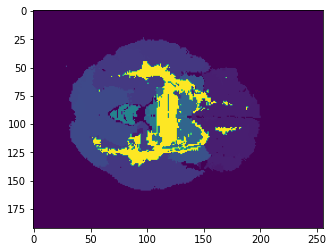

144


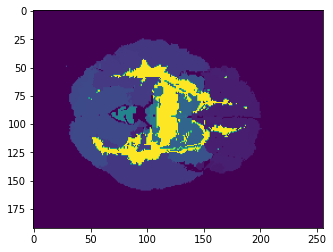

145


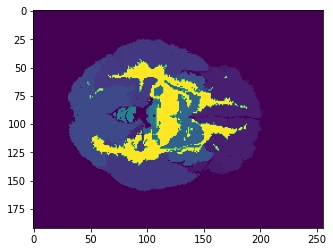

146


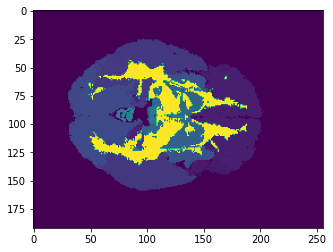

147


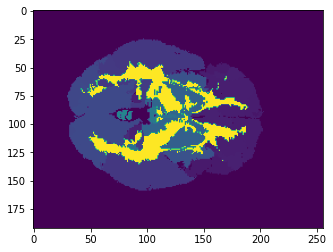

148


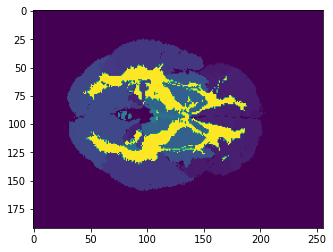

149


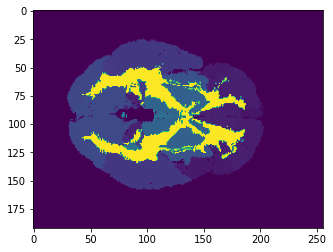

150


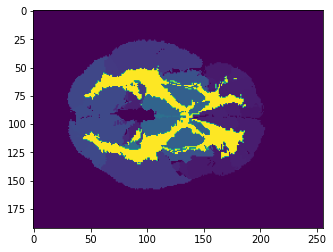

151


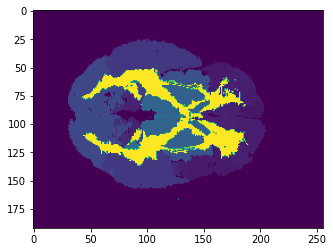

152


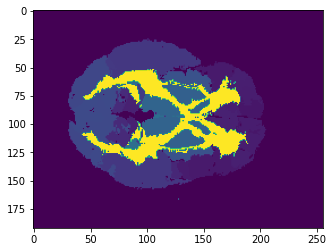

153


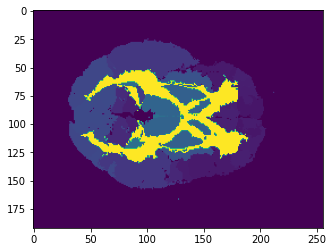

154


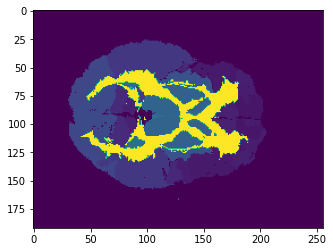

155


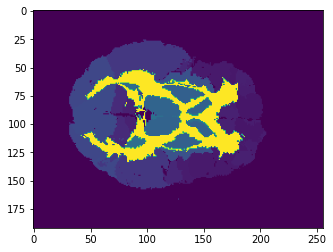

156


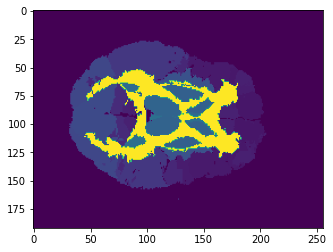

157


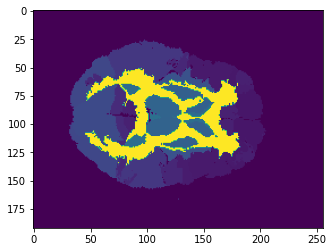

158


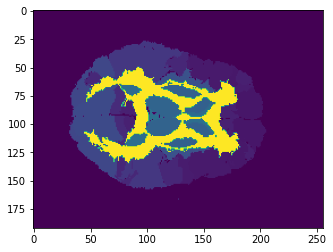

159


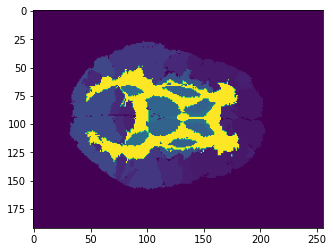

160


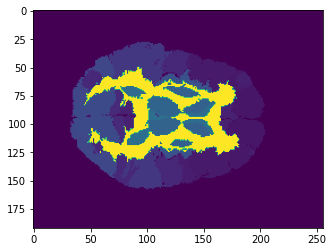

161


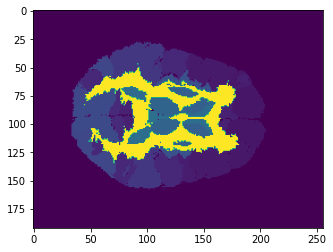

162


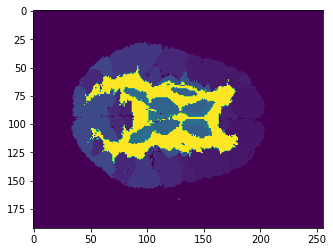

163


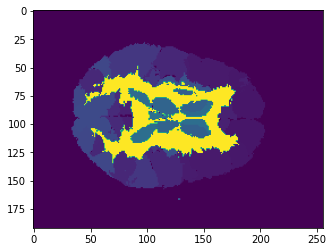

164


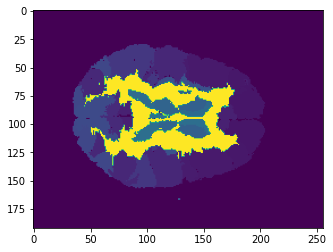

165


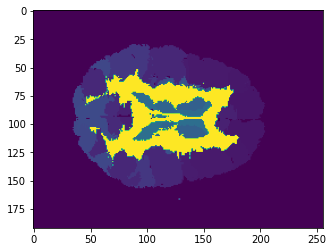

166


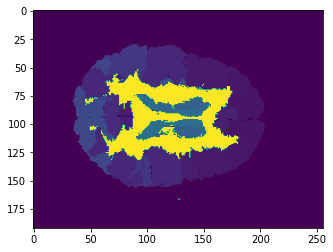

167


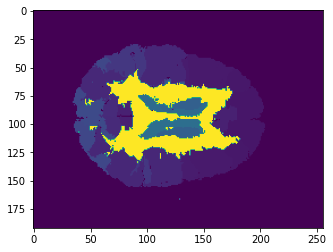

168


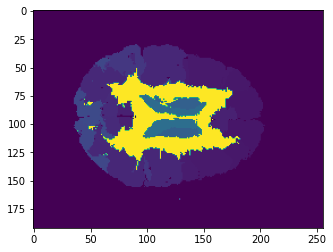

169


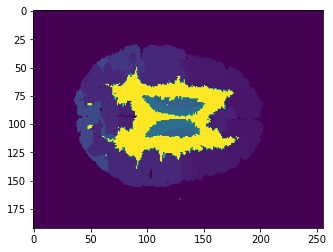

170


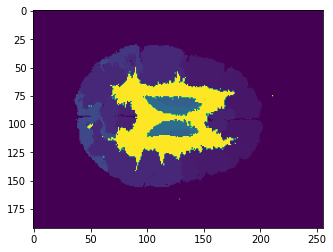

171


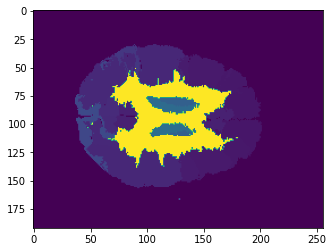

172


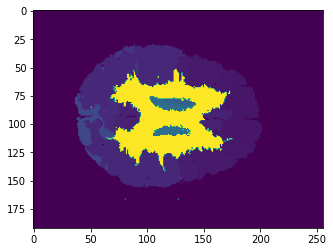

173


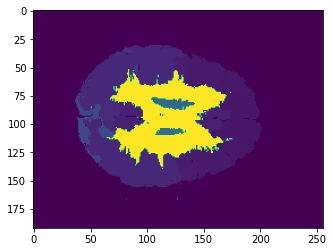

174


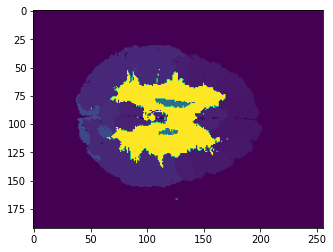

175


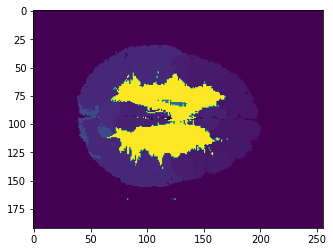

176


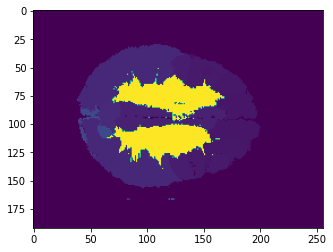

177


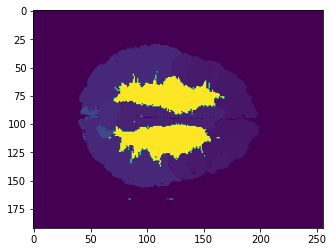

178


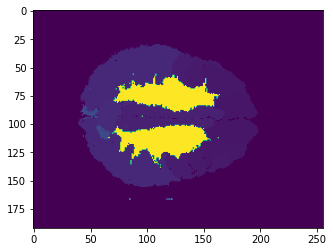

179


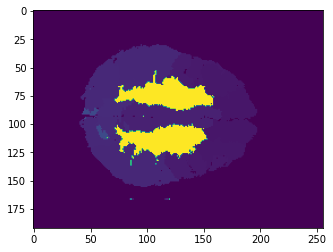

180


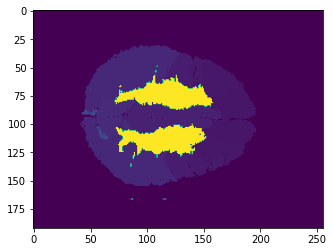

181


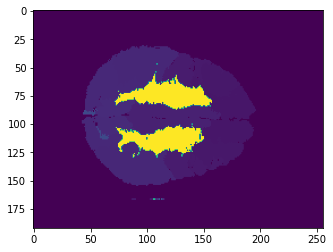

182


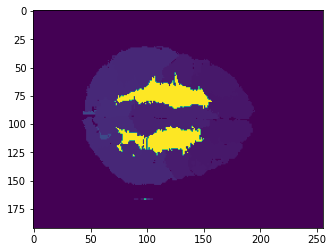

183


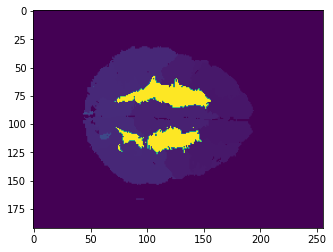

184


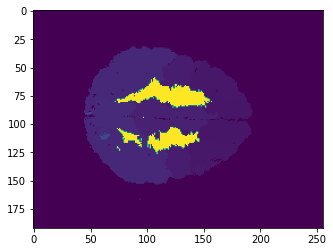

185


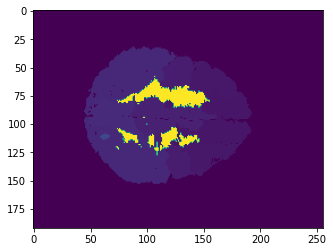

186


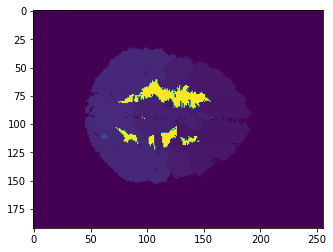

187


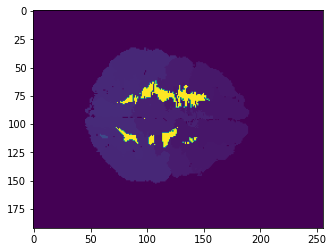

188


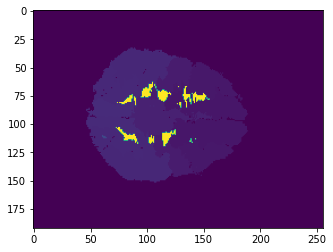

189


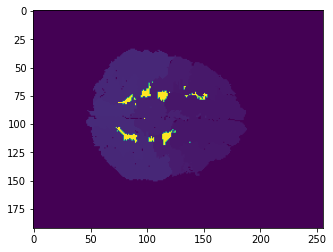

190


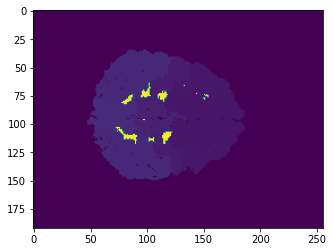

191


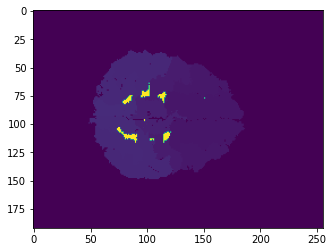

192


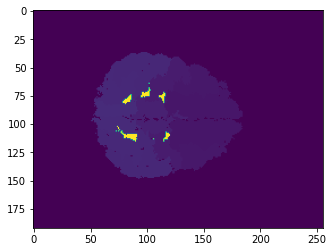

193


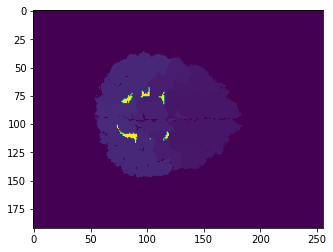

194


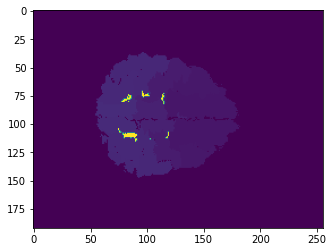

195


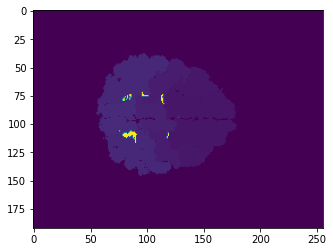

196


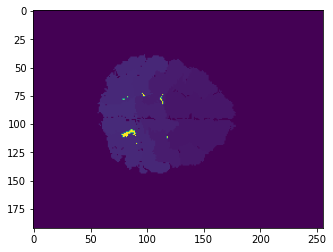

197


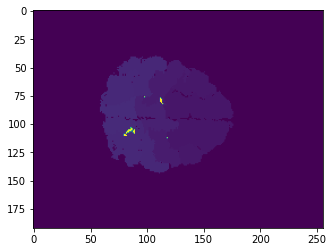

198


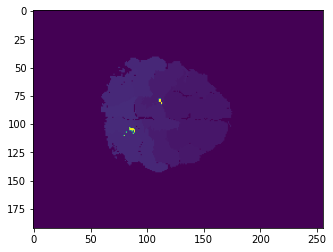

199


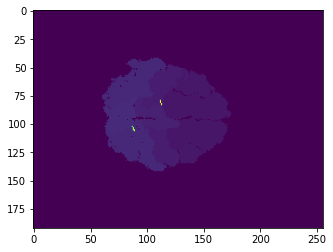

200


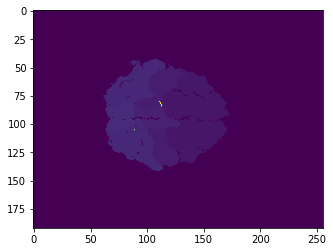

201


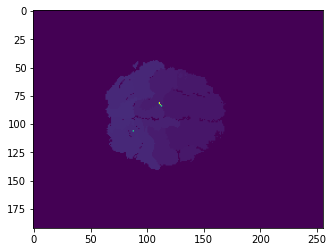

202


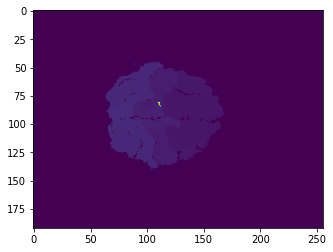

203


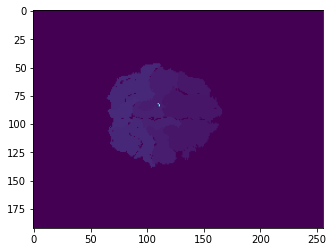

204


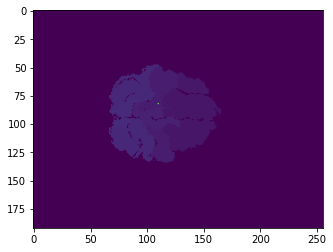

205


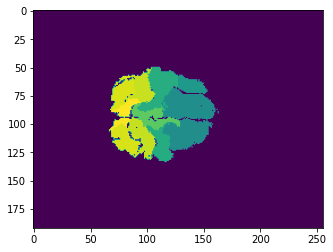

206


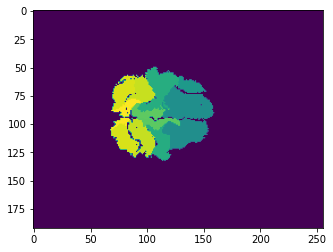

207


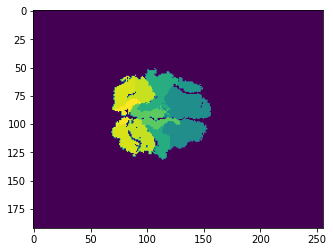

208


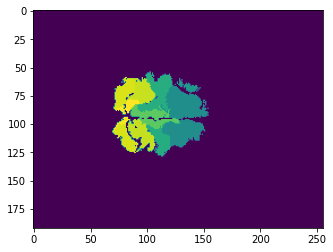

209


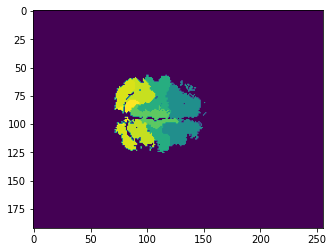

210


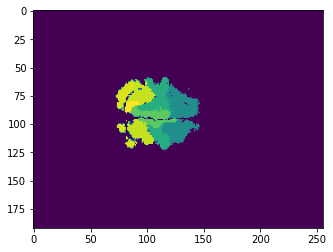

211


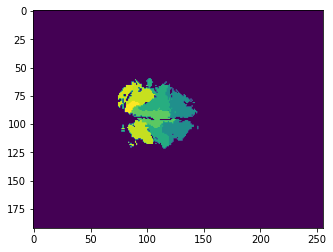

212


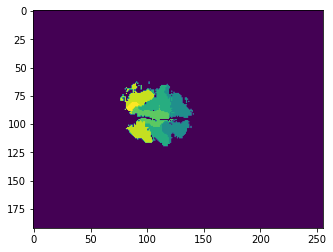

213


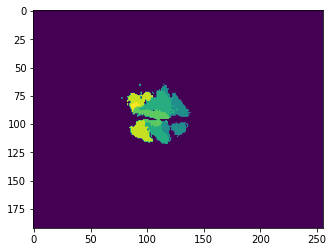

214


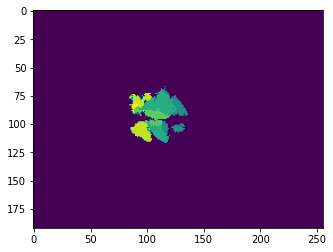

215


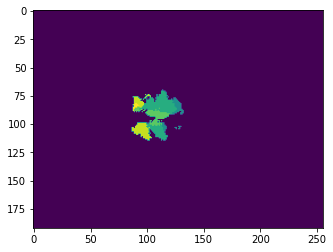

216


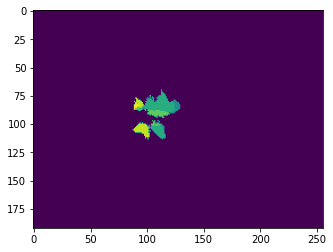

217


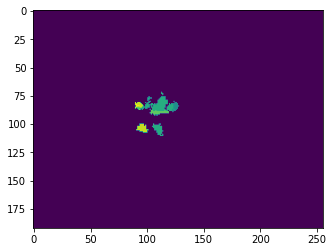

218


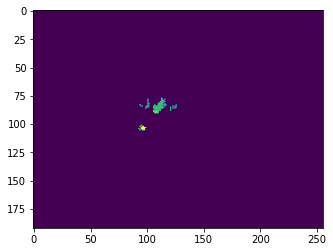

219


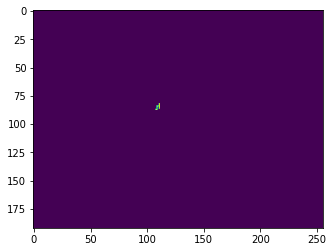

220


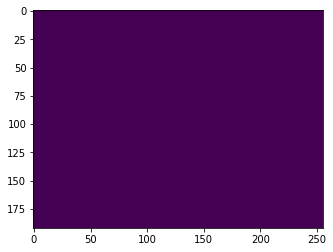

221


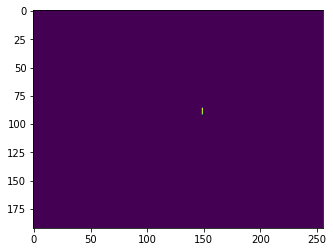

222


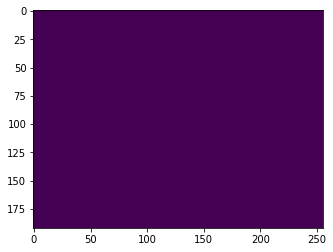

223


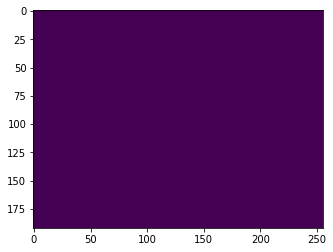

224


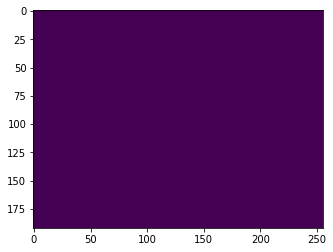

225


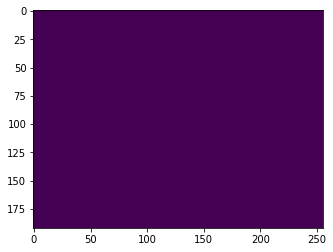

226


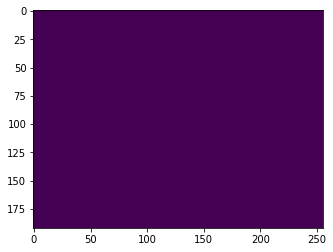

227


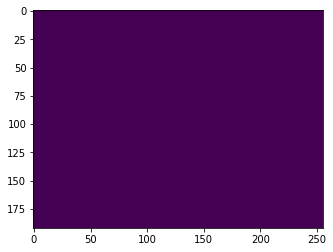

228


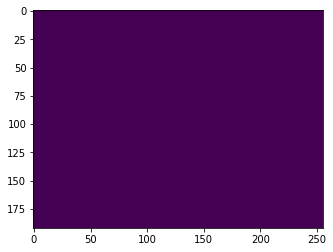

229


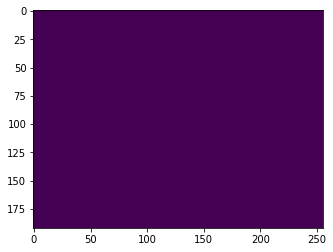

230


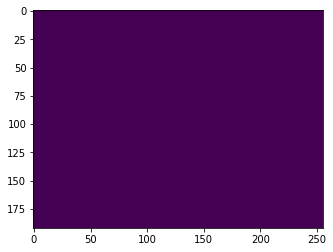

231


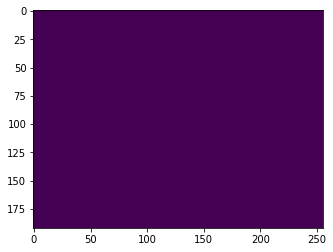

232


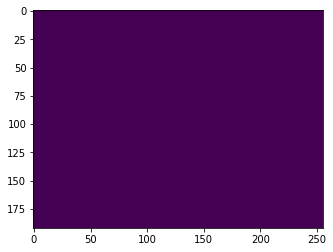

233


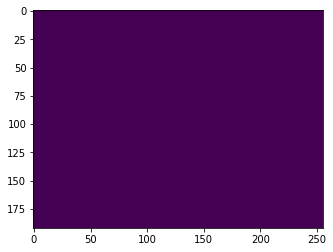

234


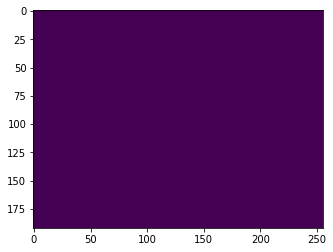

235


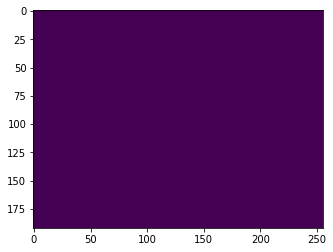

236


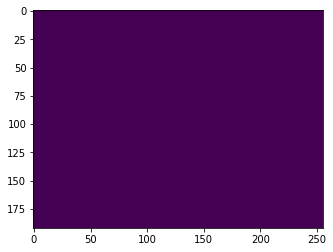

237


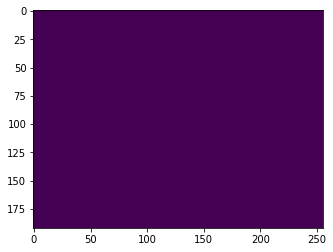

238


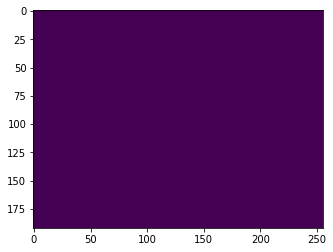

239


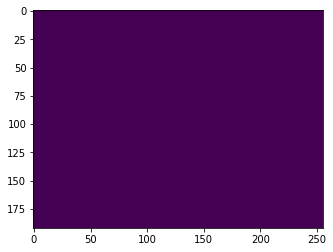

240


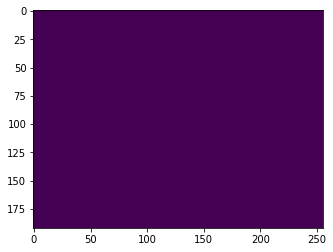

241


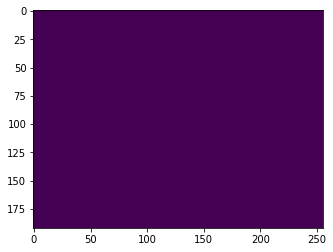

242


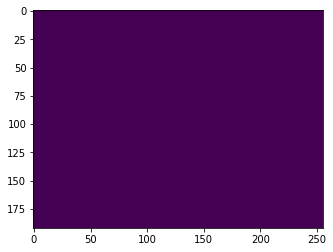

243


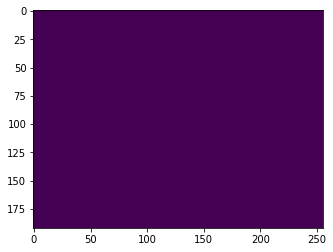

244


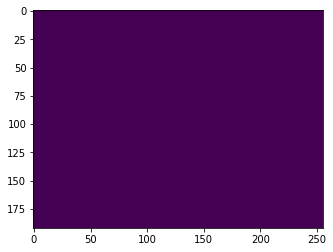

245


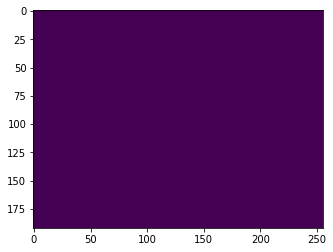

246


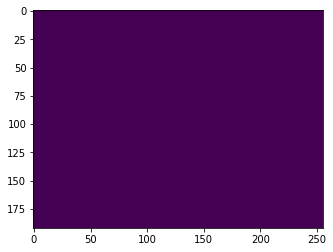

247


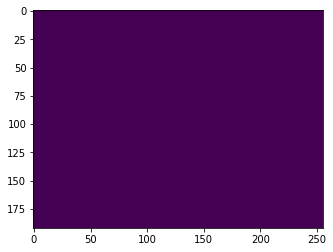

248


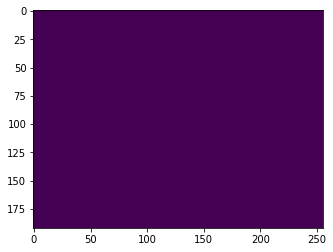

249


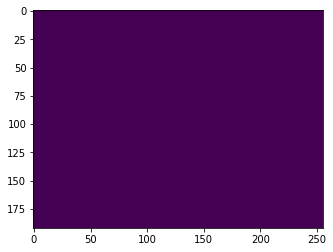

250


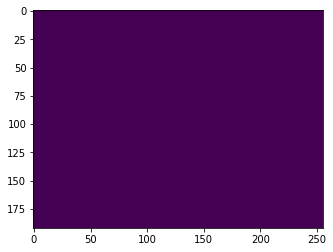

251


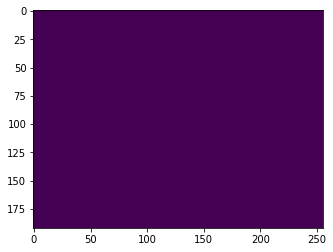

252


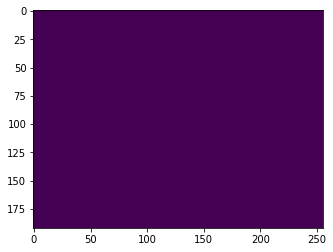

253


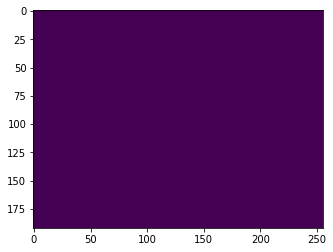

254


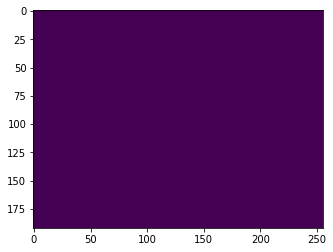

255


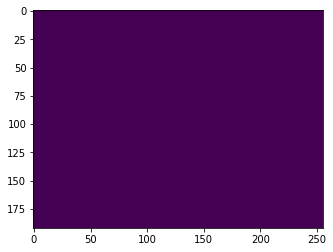

In [101]:
fmri=r"C:\Users\luhar\SIH 2022\Data2\NFBS_Dataset\NFBS_Dataset\A00064081\sub-A00064081_ses-NFB3_T1w.svreg.init.label.nii.gz"
data, affine, hardi_img = load_nifti(fmri, return_img=True)
labels = load_nifti_data(fmri)
print(labels.min(),labels.max())
print(np.unique(labels))
for i in range(labels.shape[2]):
    print(i)
    plt.imshow(labels[:,:,i])
    plt.show()

In [89]:
whitematter= (labels == 344) | (labels == 345) | (labels==346) | (labels==347) 

0


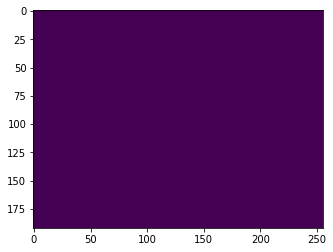

1


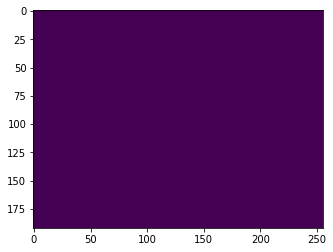

2


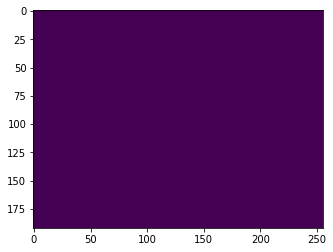

3


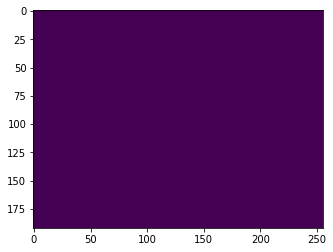

4


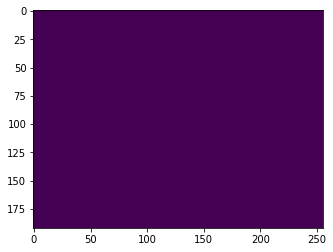

5


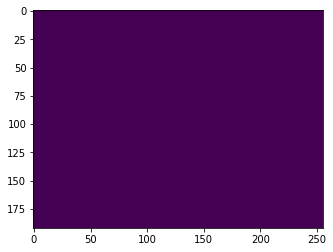

6


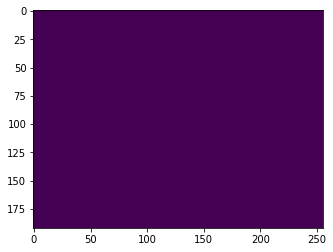

7


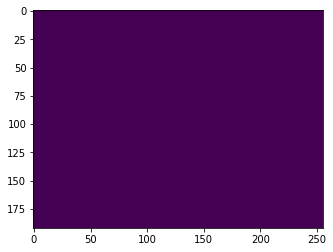

8


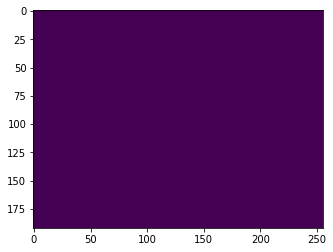

9


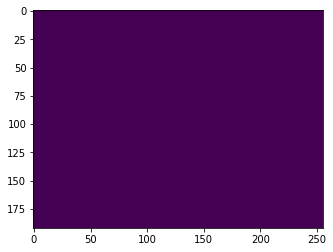

10


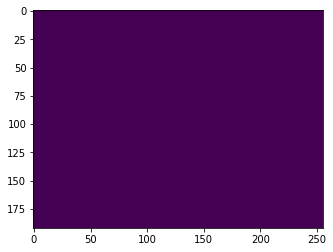

11


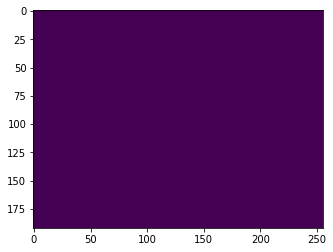

12


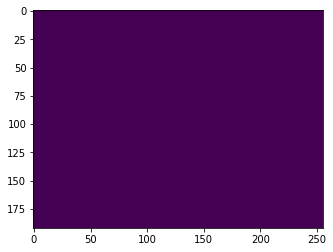

13


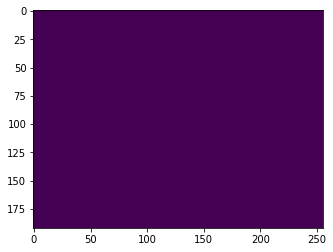

14


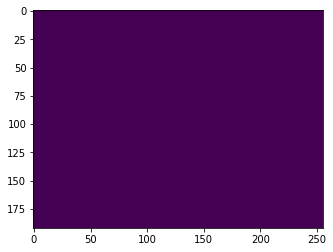

15


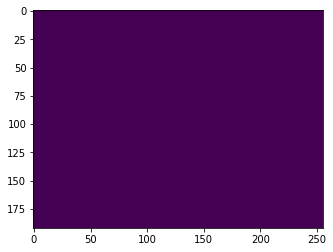

16


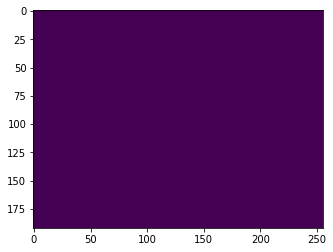

17


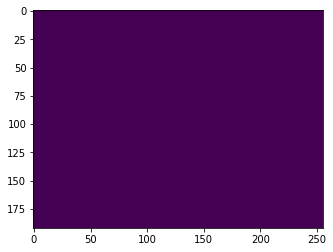

18


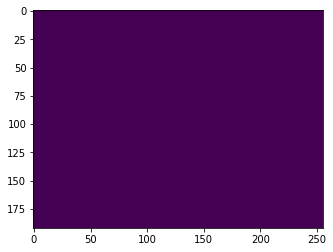

19


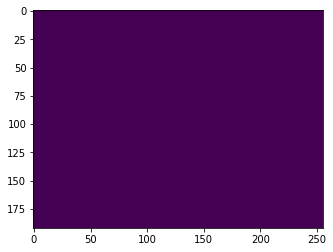

20


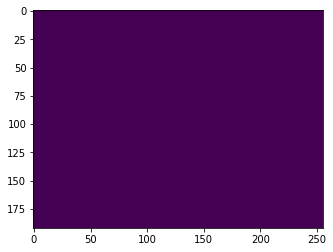

21


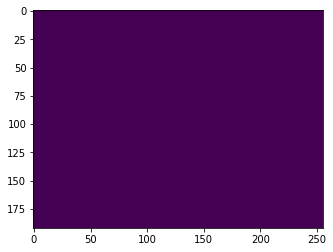

22


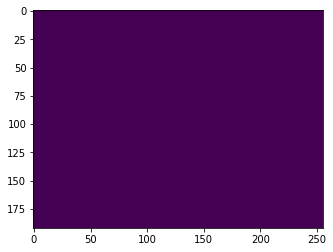

23


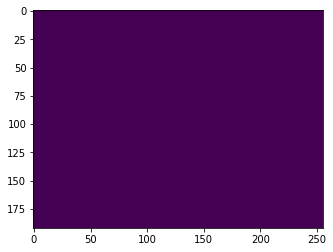

24


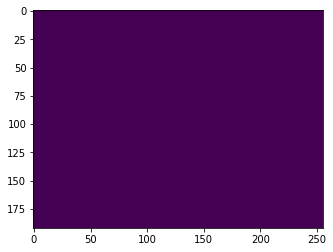

25


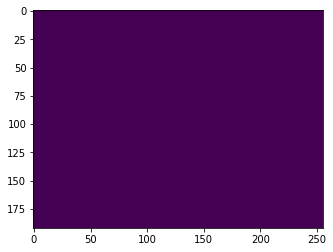

26


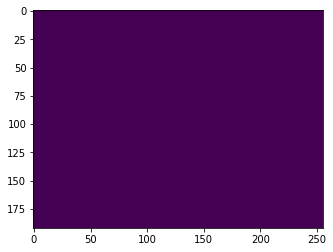

27


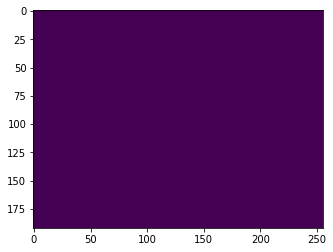

28


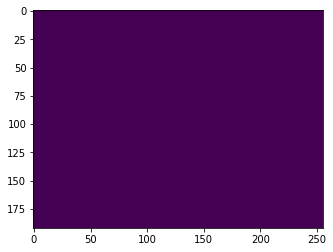

29


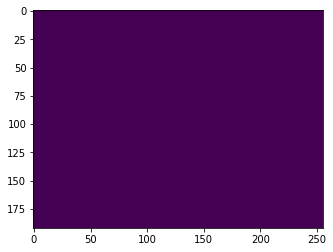

30


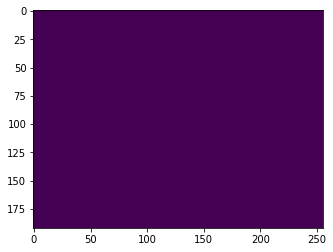

31


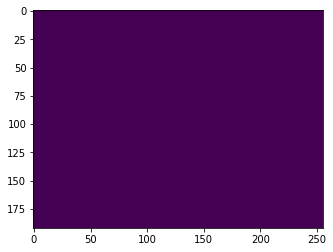

32


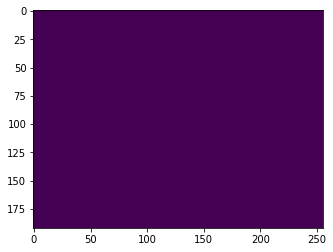

33


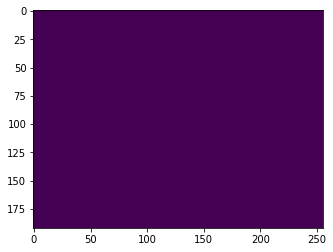

34


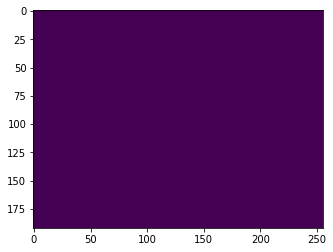

35


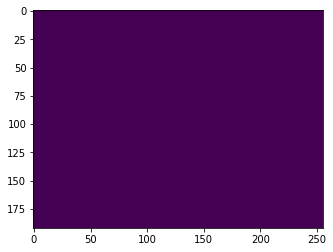

36


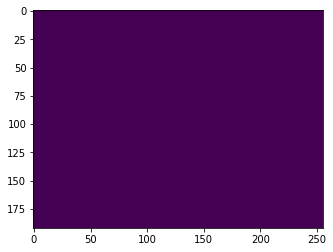

37


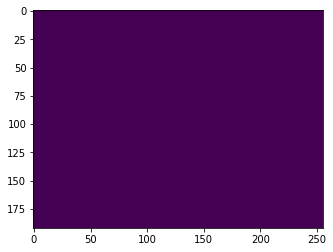

38


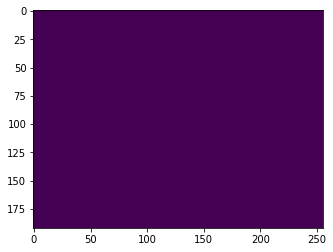

39


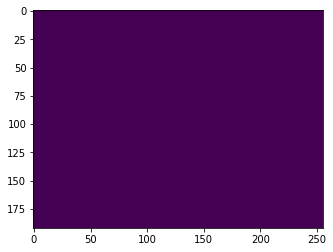

40


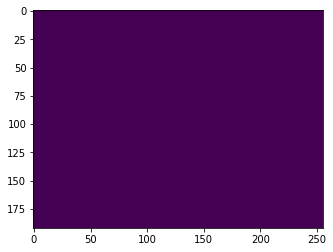

41


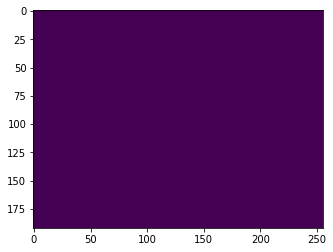

42


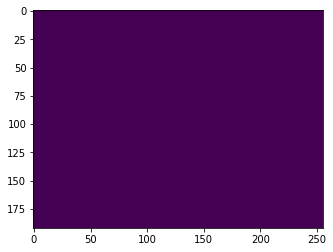

43


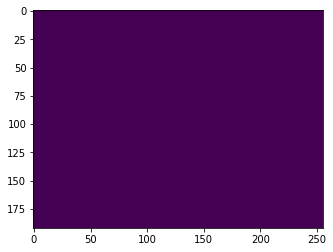

44


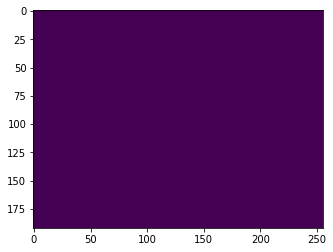

45


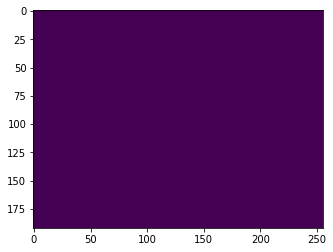

46


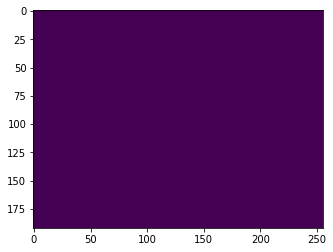

47


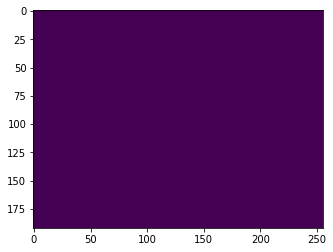

48


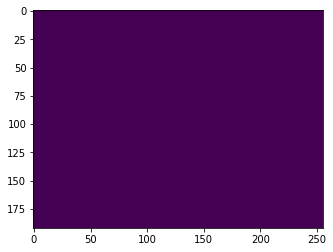

49


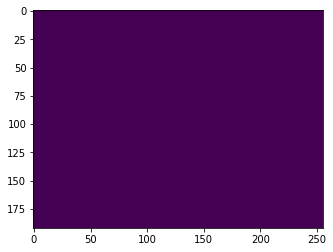

50


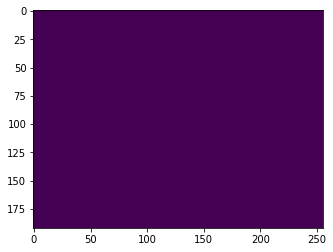

51


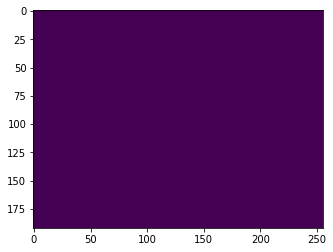

52


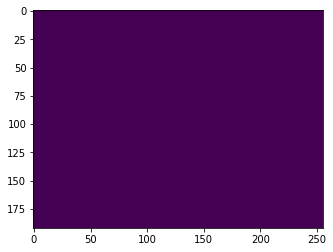

53


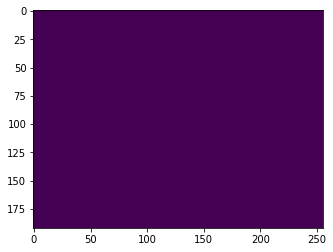

54


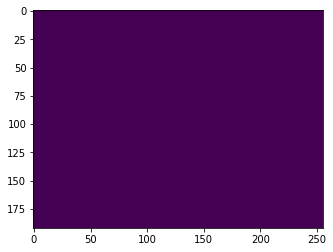

55


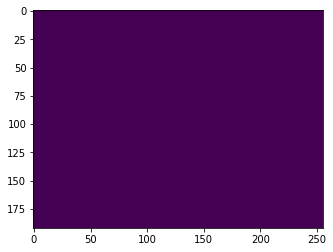

56


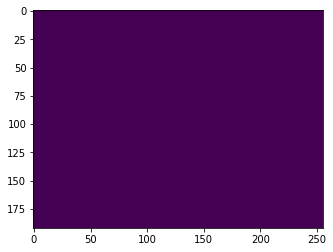

57


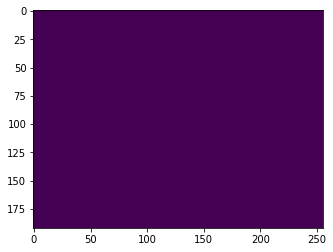

58


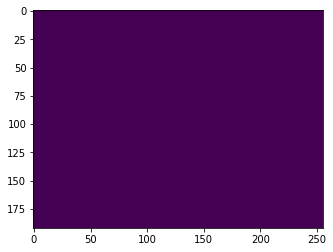

59


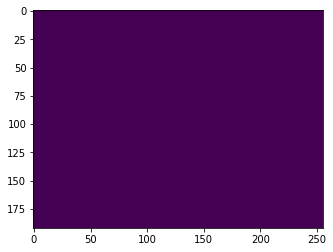

60


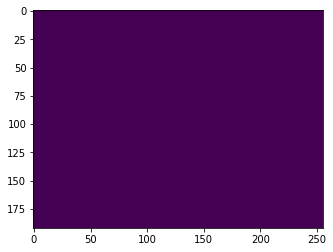

61


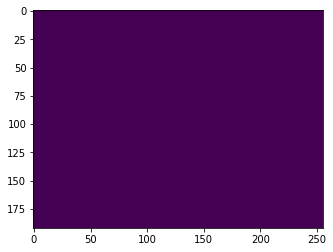

62


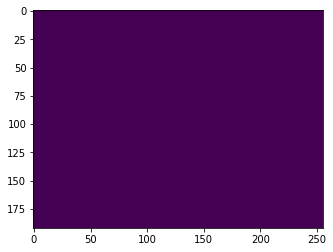

63


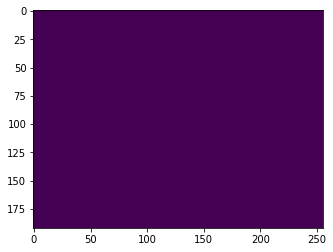

64


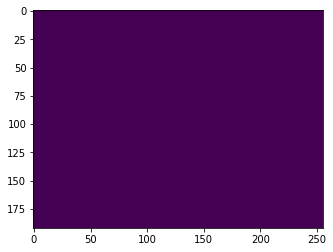

65


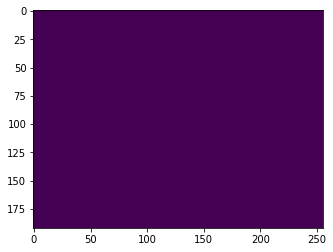

66


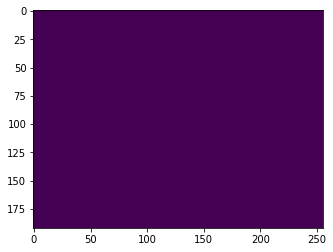

67


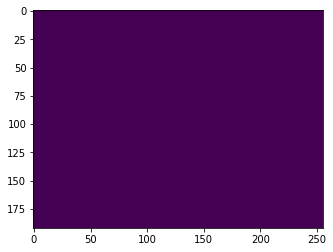

68


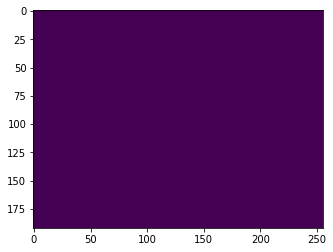

69


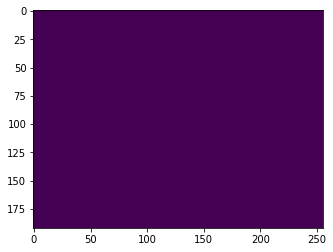

70


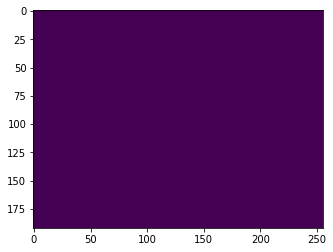

71


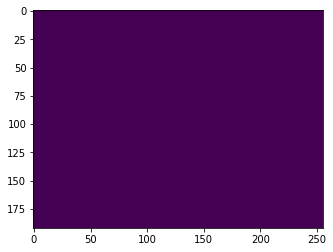

72


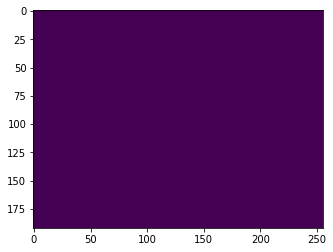

73


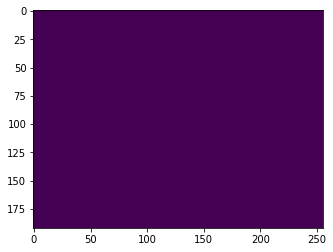

74


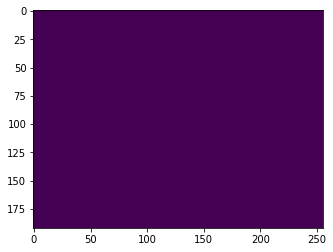

75


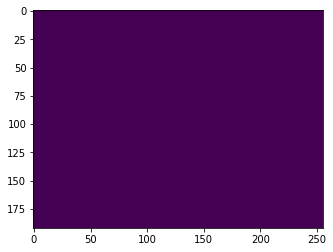

76


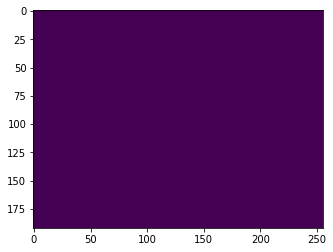

77


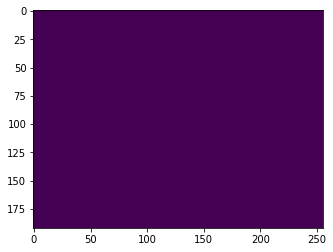

78


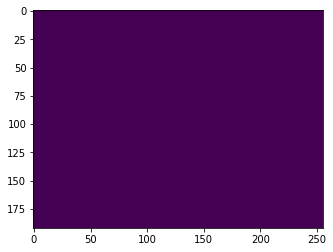

79


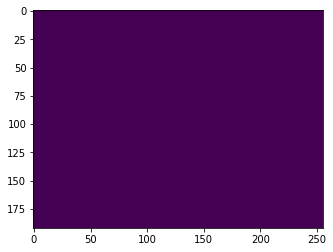

80


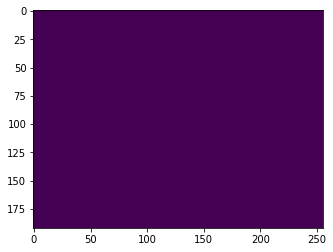

81


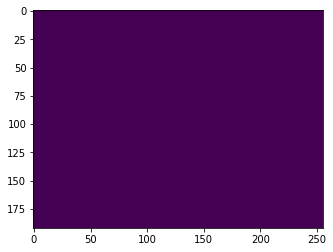

82


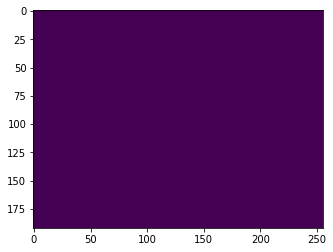

83


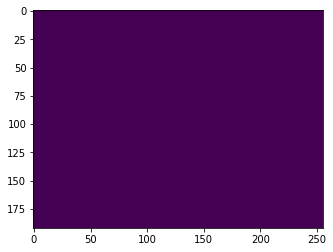

84


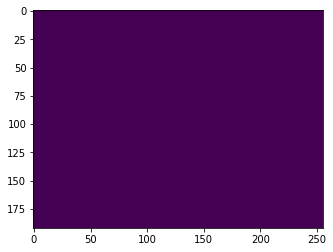

85


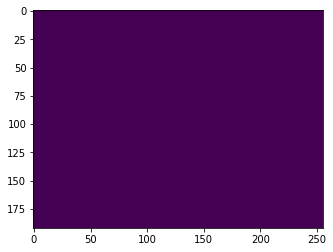

86


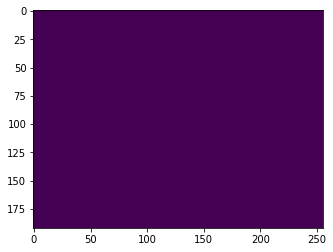

87


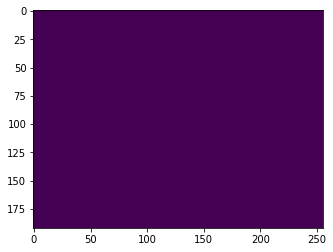

88


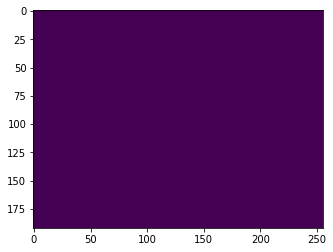

89


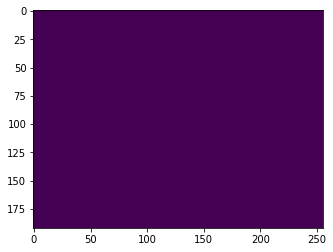

90


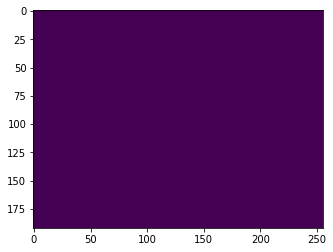

91


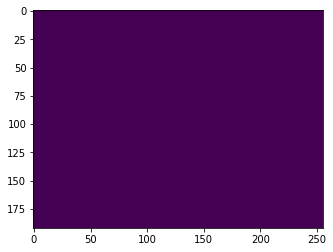

92


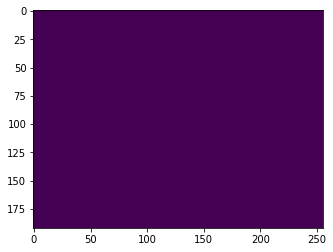

93


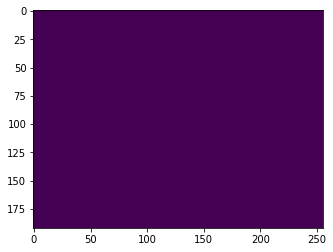

94


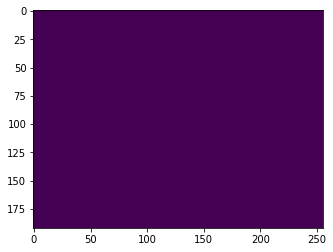

95


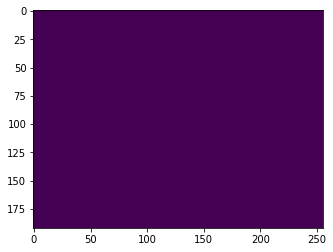

96


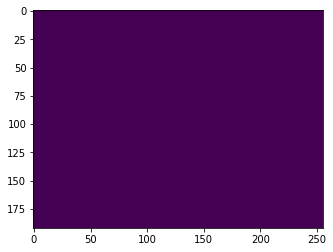

97


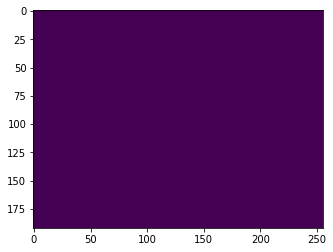

98


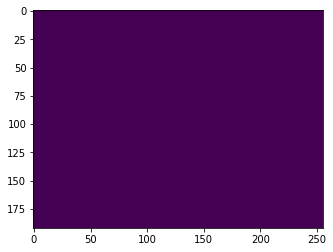

99


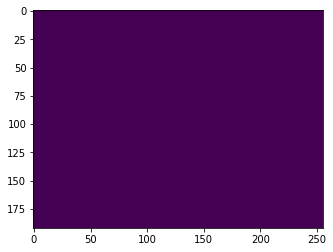

100


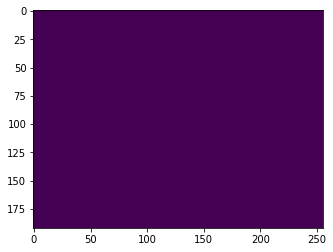

101


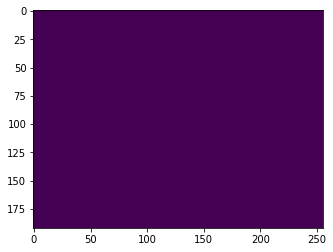

102


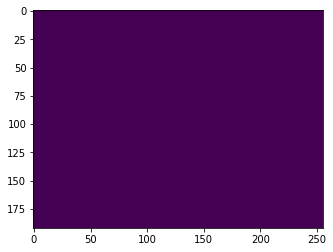

103


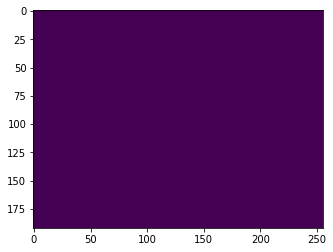

104


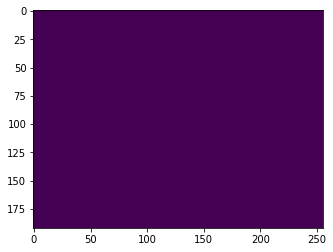

105


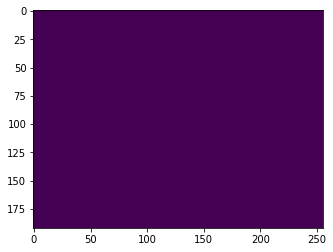

106


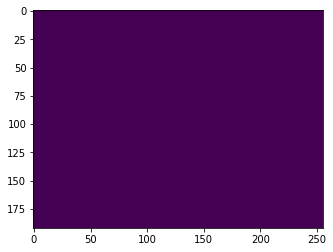

107


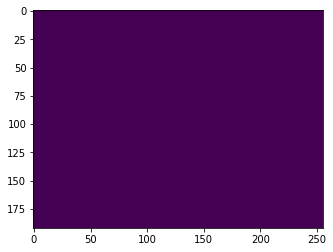

108


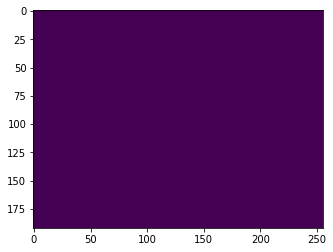

109


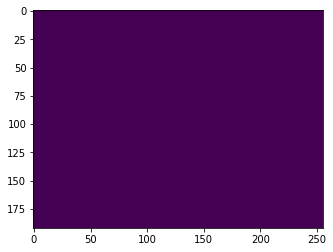

110


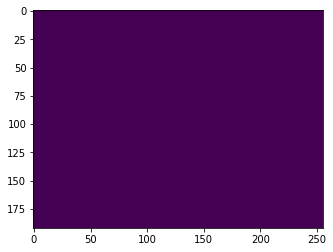

111


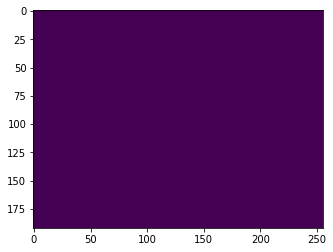

112


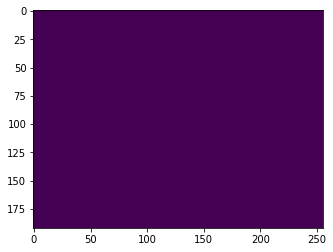

113


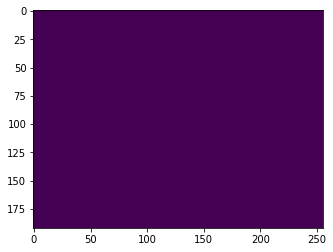

114


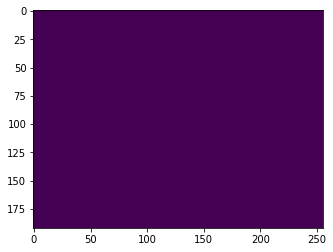

115


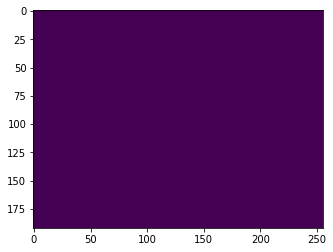

116


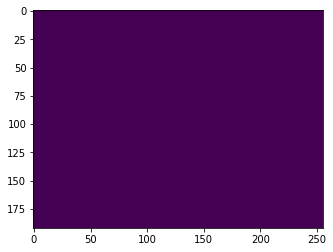

117


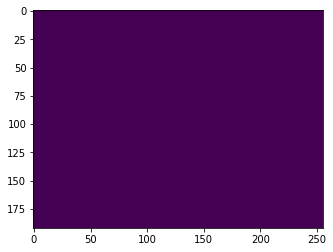

118


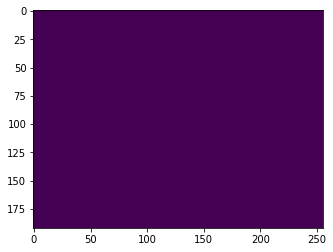

119


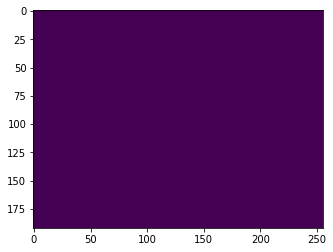

120


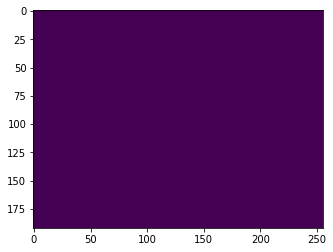

121


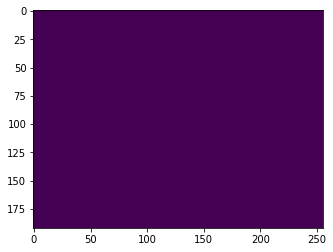

122


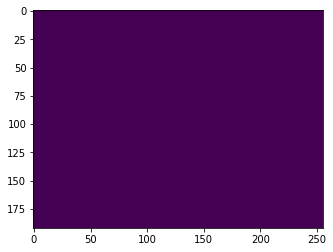

123


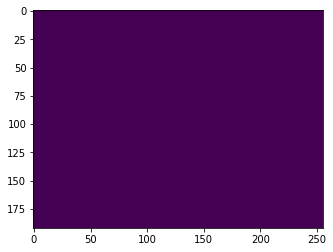

124


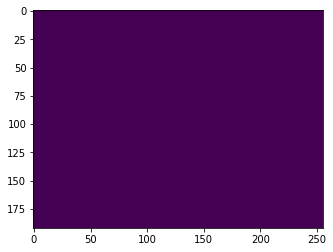

125


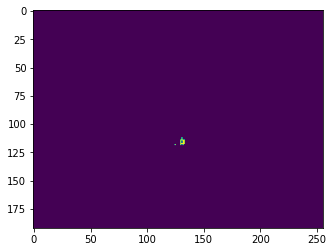

126


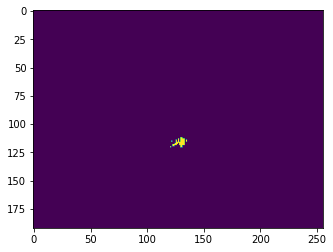

127


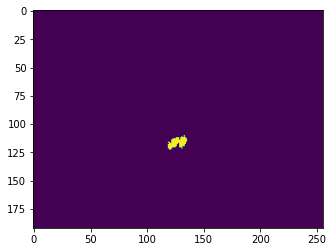

128


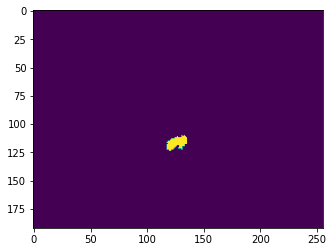

129


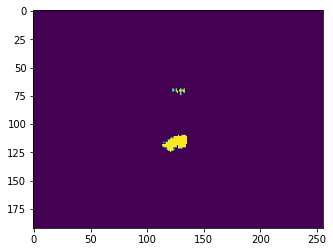

130


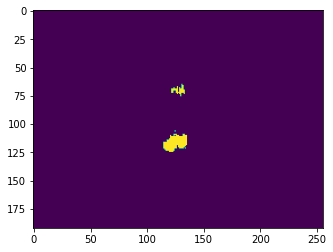

131


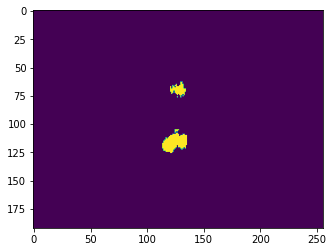

132


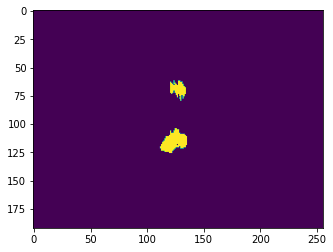

133


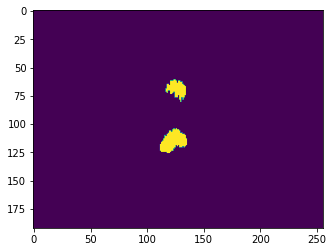

134


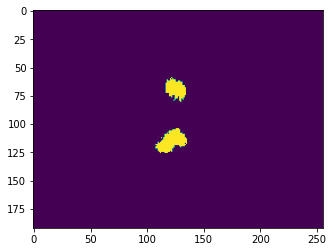

135


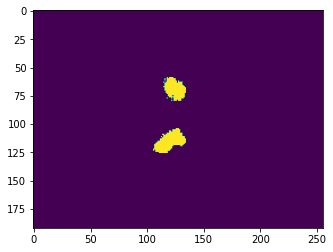

136


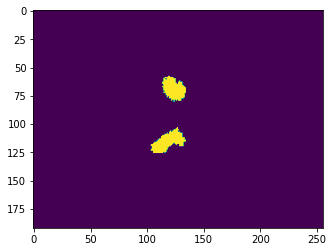

137


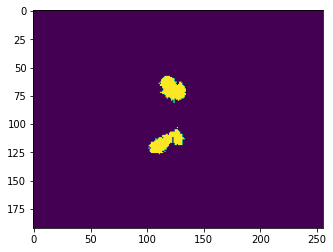

138


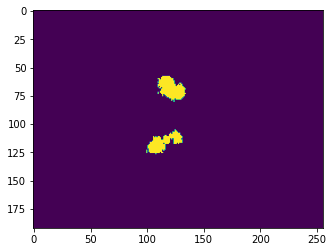

139


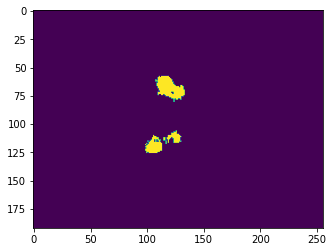

140


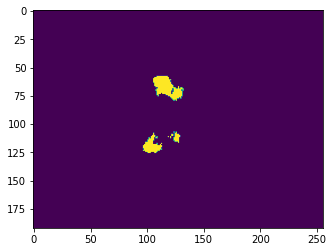

141


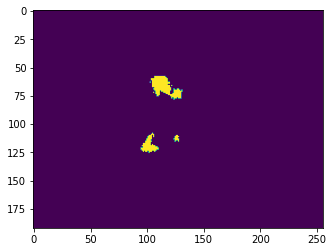

142


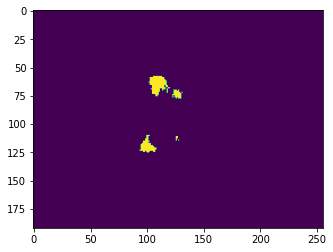

143


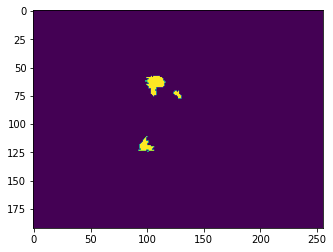

144


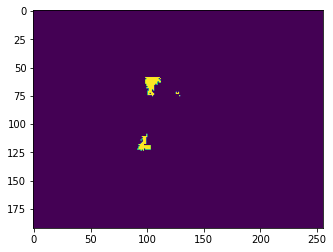

145


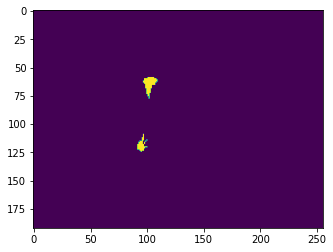

146


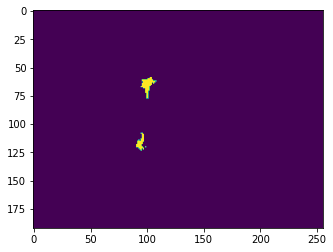

147


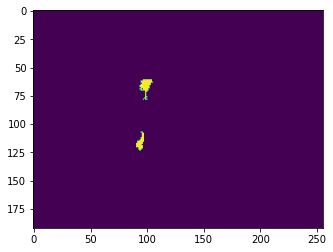

148


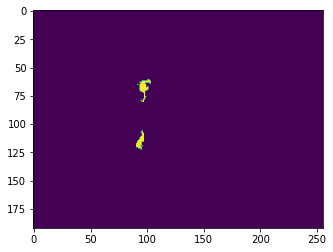

149


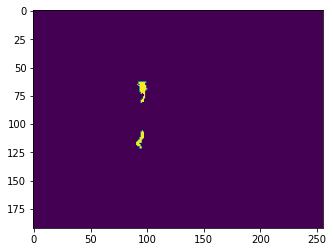

150


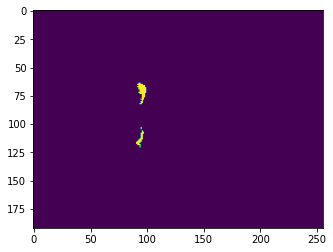

151


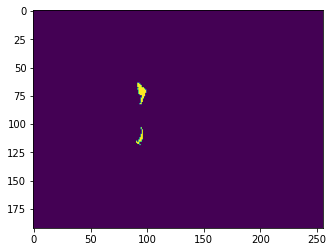

152


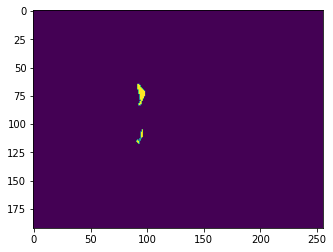

153


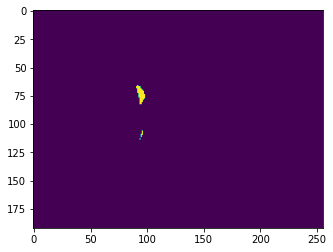

154


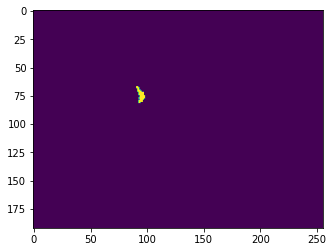

155


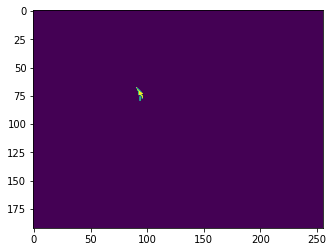

156


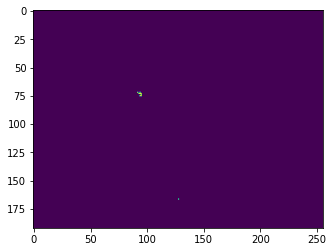

157


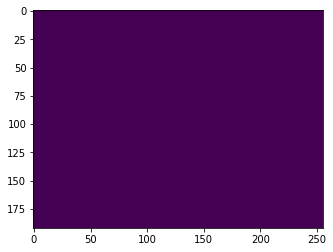

158


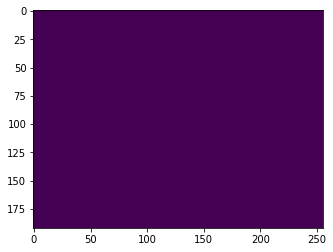

159


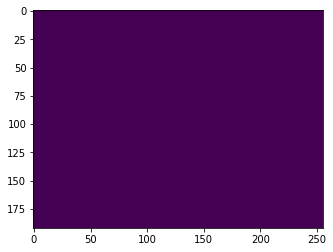

160


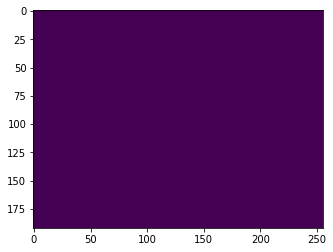

161


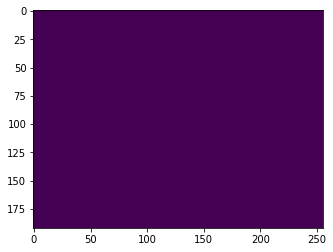

162


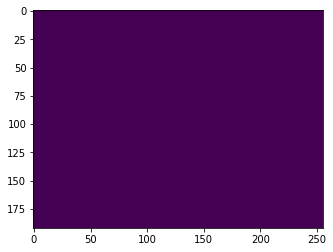

163


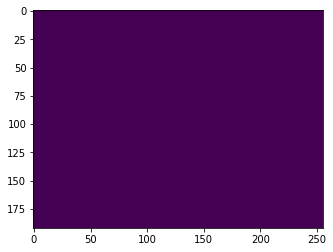

164


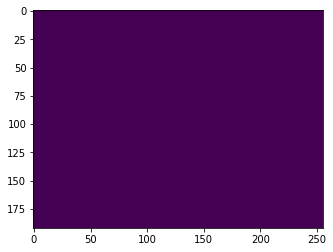

165


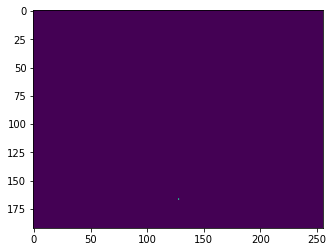

166


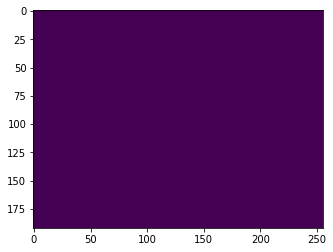

167


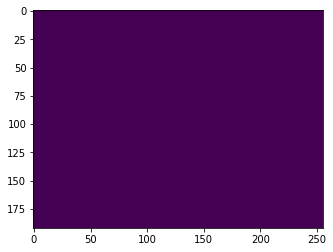

168


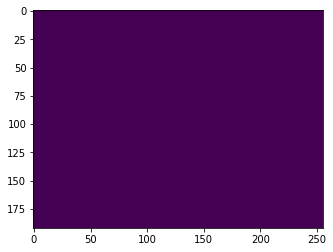

169


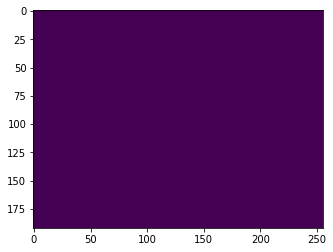

170


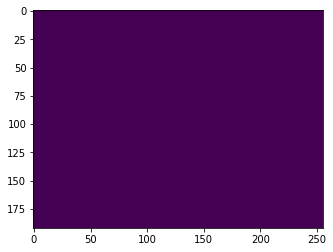

171


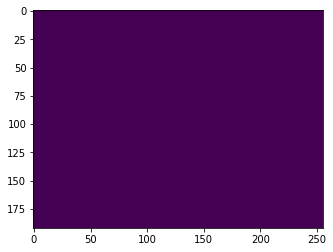

172


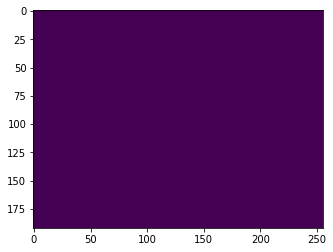

173


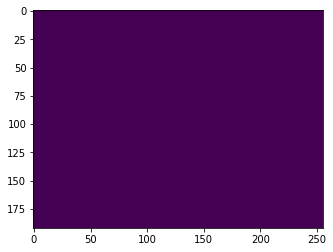

174


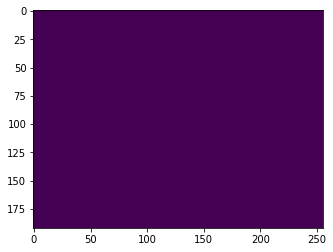

175


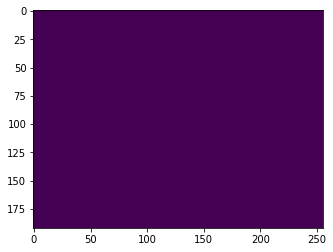

176


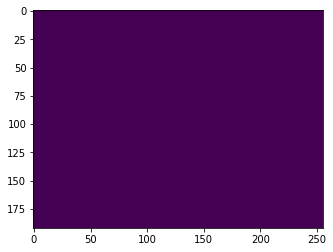

177


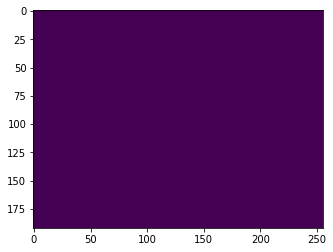

178


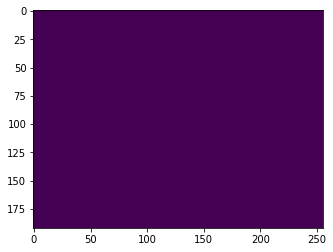

179


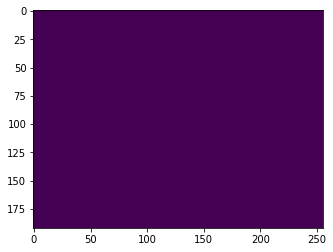

In [96]:
for i in range(180):
    print(i)
    plt.imshow(whitematter[:,:,i])
    plt.show()